In [ ]:
#Install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df = pd.read_csv("/content/customer_churn.csv")
# 1. TARGET: Churn (0/1 → categorical)
df['Churn'] = df['Churn'].map({0: "Not Churn", 1: "Churn"}).astype("category")

# 2. Binary/Categorical
df['Complaints'] = df['Complaints'].map({0: "No Complaint", 1: "Complaint"}).astype("category")
df['Tariff Plan'] = df['Tariff Plan'].map({1: "Pay as you go", 2: "Contract"}).astype("category")
df['Status'] = df['Status'].map({1: "Inactive", 2: "Active"}).astype("category")

# 3. Ordinal variables
df['Age Group'] = df['Age Group'].map({
    1: "Youth",
    2: "Young Adult",
    3: "Adult",
    4: "Middle-aged",
    5: "Senior"
}).astype("category")

# Check final dtypes
print(df.dtypes)

# Optional: Save output
df.to_csv("/content/drive/MyDrive/Customer Churn Dataset", index=False)


KeyError: 'Complaints'

In [ ]:
df = pd.read_csv('/content/customer_churn.csv')

print(df.head())

   Call Failure  Complaints  Subscription Length Charge Amount  \
0             8           0                   38      very low   
1             0           0                   39      very low   
2            10           0                   37      very low   
3            10           0                   38      very low   
4             3           0                   38      very low   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers    Age Group  Tariff Plan    Status  Age  \
0                       17        adult            1    active   30   
1                        4  young adult            1  inactive   25   
2                       24        adult        

In [ ]:
#	Check the number of records and columns

print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")
print()

Rows: 3150, Columns: 14




In [ ]:
print("\nData types:\n", df.dtypes)



Data types:
 Call Failure                 int64
Complaints                  object
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                   object
Tariff Plan                 object
Status                      object
Age                          int64
Customer Value             float64
Churn                       object
dtype: object


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(" CATEGORICAL SUMMARY ")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

 CATEGORICAL SUMMARY 

Column: Complaints
Complaints
No Complaint    2909
Complaint        241
Name: count, dtype: int64

Column: Age Group
Age Group
Adult          1425
Young Adult    1037
Middle-aged     395
Senior          170
Youth           123
Name: count, dtype: int64

Column: Tariff Plan
Tariff Plan
Pay as you go    2905
Contract          245
Name: count, dtype: int64

Column: Status
Status
Inactive    2368
Active       782
Name: count, dtype: int64

Column: Churn
Churn
Not Churn    2655
Churn         495
Name: count, dtype: int64


In [ ]:
df.describe()


Call Failure  Subscription Length  Charge Amount  Seconds of Use  \
count   3150.000000          3150.000000    3150.000000     3150.000000   
mean       7.627937            32.541905       0.942857     4472.459683   
std        7.263886             8.573482       1.521072     4197.908687   
min        0.000000             3.000000       0.000000        0.000000   
25%        1.000000            30.000000       0.000000     1391.250000   
50%        6.000000            35.000000       0.000000     2990.000000   
75%       12.000000            38.000000       1.000000     6478.250000   
max       36.000000            47.000000      10.000000    17090.000000   

       Frequency of use  Frequency of SMS  Distinct Called Numbers  \
count       3150.000000       3150.000000              3150.000000   
mean          69.460635         73.174921                23.509841   
std           57.413308        112.237560                17.217337   
min            0.000000          0.000000                 0.000000   
25%           27.000000          6.000000                10.000000   
50%           54.000000         21.000000                21.000000   
75%           95.000000         87.000000                34.000000   
max          255.000000        522.000000                97.000000   

               Age  Customer Value  
count  3150.000000     3150.000000  
mean     30.998413      470.972916  
std       8.831095      517.015433  
min      15.000000        0.000000  
25%      25.000000      113.801250  
50%      30.000000      228.480000  
75%      30.000000      788.388750  
max      55.000000     2165.280000

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [ ]:
print("---- Duplicate Rows ----")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

---- Duplicate Rows ----
Number of duplicate rows: 300



In [ ]:
numeric_cols = [
    "Call Failure", "Subscription Length", "Seconds of Use",
    "Frequency of use", "Frequency of SMS", "Distinct Called Numbers",
    "Customer Value", "Age"
]

print("---- Out-of-Range Value Checks (Negative Values) ----")
for col in numeric_cols:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        print(f"{col}: {neg_count} negative values")

print("\n---- Numeric Summary (to detect outliers) ----")
print(df[numeric_cols].describe(), "\n")


---- Out-of-Range Value Checks (Negative Values) ----
Call Failure: 0 negative values
Subscription Length: 0 negative values
Seconds of Use: 0 negative values
Frequency of use: 0 negative values
Frequency of SMS: 0 negative values
Distinct Called Numbers: 0 negative values
Customer Value: 0 negative values
Age: 0 negative values

---- Numeric Summary (to detect outliers) ----
       Call Failure  Subscription Length  Seconds of Use  Frequency of use  \
count   3150.000000          3150.000000     3150.000000       3150.000000   
mean       7.627937            32.541905     4472.459683         69.460635   
std        7.263886             8.573482     4197.908687         57.413308   
min        0.000000             3.000000        0.000000          0.000000   
25%        1.000000            30.000000     1391.250000         27.000000   
50%        6.000000            35.000000     2990.000000         54.000000   
75%       12.000000            38.000000     6478.250000         95.000000 

In [ ]:
categorical_cols = [
    "Complaints", "Tariff Plan", "Status",
    "Churn", "Charge Amount", "Age Group"
]

print("===== CATEGORICAL VALUE CHECKS =====")

for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print("Raw unique values:")
        print(df[col].unique())

        # Detect leading/trailing spaces
        if df[col].dtype == 'object':
            stripped_unique = df[col].str.strip().unique()
            print("Values after stripping spaces:")
            print(stripped_unique)

        # Detect case inconsistencies
        if df[col].dtype == 'object':
            lower_unique = df[col].str.strip().str.lower().unique()
            print("Lowercased values (check for duplicates):")
            print(lower_unique)

        # Check if values should be binary but aren't
        if col in ["Complaints", "Tariff Plan", "Churn"]:
            invalid = df[~df[col].isin([0, 1, 2])] if col == "Tariff Plan" else df[~df[col].isin([0, 1])]
            if len(invalid) > 0:
                print("⚠ Invalid values found:")
                print(invalid[col].value_counts())
            else:
                print("✔ No invalid values detected.")

===== CATEGORICAL VALUE CHECKS =====

--- Complaints ---
Raw unique values:
['No Complaint' 'Complaint']
Values after stripping spaces:
['No Complaint' 'Complaint']
Lowercased values (check for duplicates):
['no complaint' 'complaint']
⚠ Invalid values found:
Complaints
No Complaint    2909
Complaint        241
Name: count, dtype: int64

--- Tariff Plan ---
Raw unique values:
['Pay as you go' 'Contract']
Values after stripping spaces:
['Pay as you go' 'Contract']
Lowercased values (check for duplicates):
['pay as you go' 'contract']
⚠ Invalid values found:
Tariff Plan
Pay as you go    2905
Contract          245
Name: count, dtype: int64

--- Status ---
Raw unique values:
['Inactive' 'Active']
Values after stripping spaces:
['Inactive' 'Active']
Lowercased values (check for duplicates):
['inactive' 'active']

--- Churn ---
Raw unique values:
['Not Churn' 'Churn']
Values after stripping spaces:
['Not Churn' 'Churn']
Lowercased values (check for duplicates):
['not churn' 'churn']
⚠ Invali

In [ ]:
valid_values = {
    'Tariff Plan': ['pay as you go', 'contract'],
    'Complaints': ['no-complaint', 'complaint'],
    'Status': ['active', 'inactive'],
    'Churn': ['non-churn', 'churn'],
    'Charge Amount': ['very low', 'low', 'medium', 'high', 'very high'],
    'Age Group': ['teen', 'young adult', 'adult', 'middle age', 'senior']
}

for col, valid in valid_values.items():
    invalid = df[~df[col].isin(valid)][col].value_counts()
    if not invalid.empty:
        print(f"⚠ Invalid values found in {col}:\n{invalid}\n")


⚠ Invalid values found in Tariff Plan:
Tariff Plan
Pay as you go    2905
Contract          245
Name: count, dtype: int64

⚠ Invalid values found in Complaints:
Complaints
No Complaint    2909
Complaint        241
Name: count, dtype: int64

⚠ Invalid values found in Status:
Status
Inactive    2368
Active       782
Name: count, dtype: int64

⚠ Invalid values found in Churn:
Churn
Not Churn    2655
Churn         495
Name: count, dtype: int64

⚠ Invalid values found in Charge Amount:
Charge Amount
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64

⚠ Invalid values found in Age Group:
Age Group
Adult          1425
Young Adult    1037
Middle-aged     395
Senior          170
Youth           123
Name: count, dtype: int64



In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Define target variable 'y'
# Convert 'Churn' column from string categories to numerical (0 or 1)
y = df['Churn'].map({'non-churn': 0, 'churn': 1})

# Define features 'X'
# Select numerical columns for features.
# Categorical features could be included after one-hot encoding if desired for the model.
numerical_features = [
    'Call Failure', 'Subscription Length',
    'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
   'Customer Value', 'Complaints', 'Tariff Plan',
]
X = df[numerical_features]

# Initialize and train the Logistic Regression model
# Increased max_iter to help with convergence
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Create a table of feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(importance)
importance.to_excel("feature_importance.xlsx", index=False)

               Feature  Coefficient
6           Complaints     4.021590
0         Call Failure     0.122957
5       Customer Value     0.007683
1  Subscription Length     0.004694
2       Seconds of Use    -0.000293
4     Frequency of SMS    -0.045342
3     Frequency of use    -0.048231
7          Tariff Plan    -0.376584


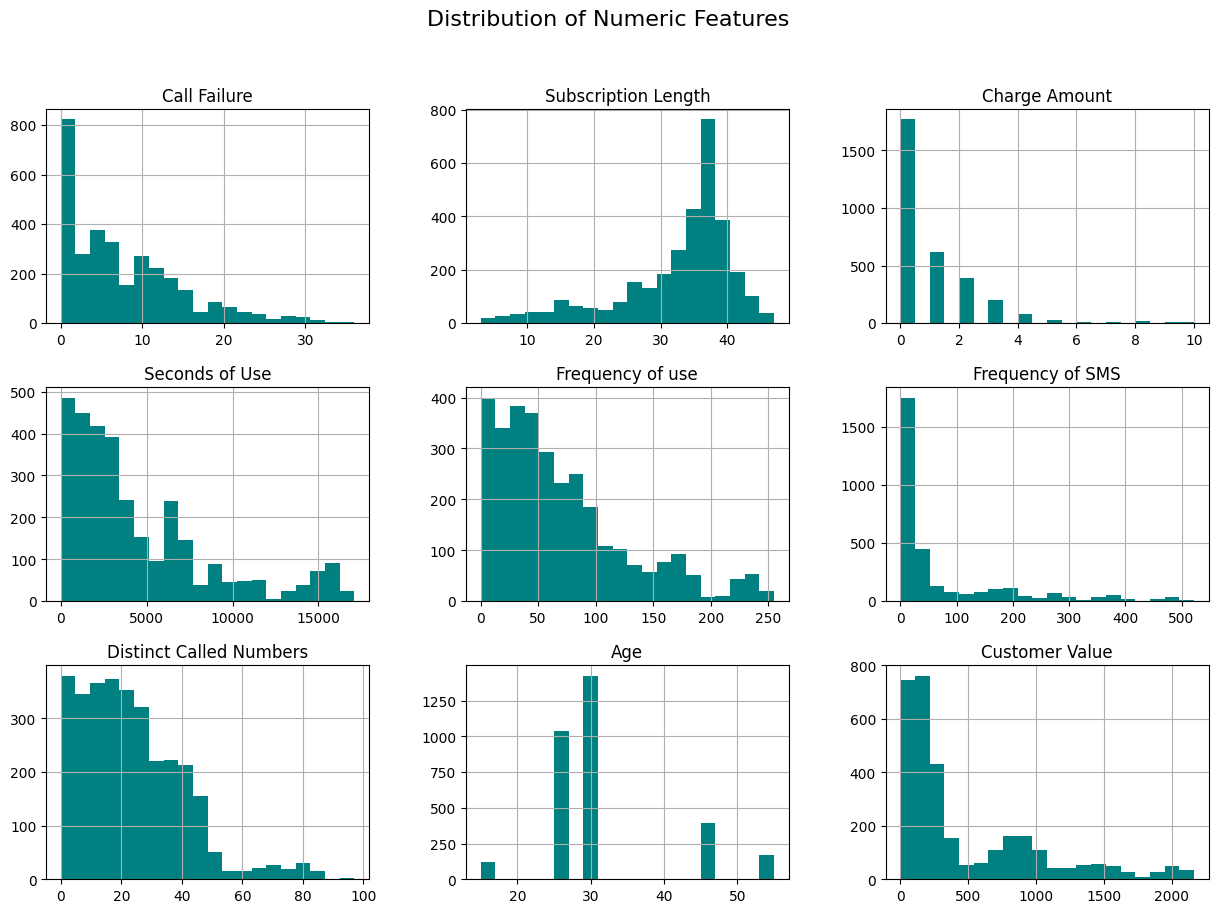

In [ ]:
df.hist(figsize=(15, 10), bins=20, color='teal')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


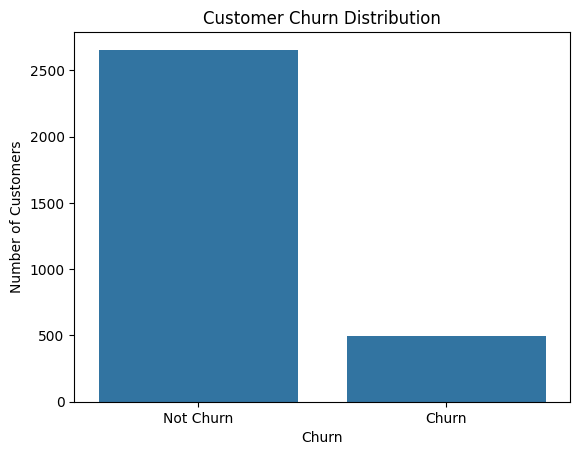

Churn
Not Churn    84.285714
Churn        15.714286
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()


# Calculate churn rate (%)
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)



Distribution for Complaints:
Complaints
No Complaint    2909
Complaint        241
Name: count, dtype: int64
Complaints
No Complaint    92.349206
Complaint        7.650794
Name: proportion, dtype: float64




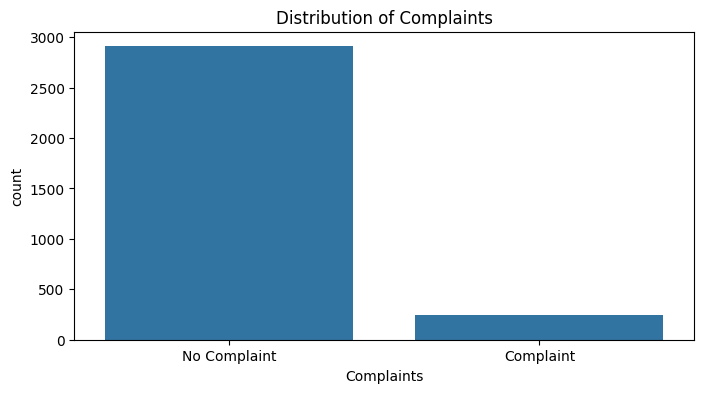

Distribution for Charge Amount:
Charge Amount
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64
Charge Amount
0     56.126984
1     19.587302
2     12.539683
3      6.317460
4      2.412698
5      0.952381
8      0.603175
9      0.444444
7      0.444444
6      0.349206
10     0.222222
Name: proportion, dtype: float64




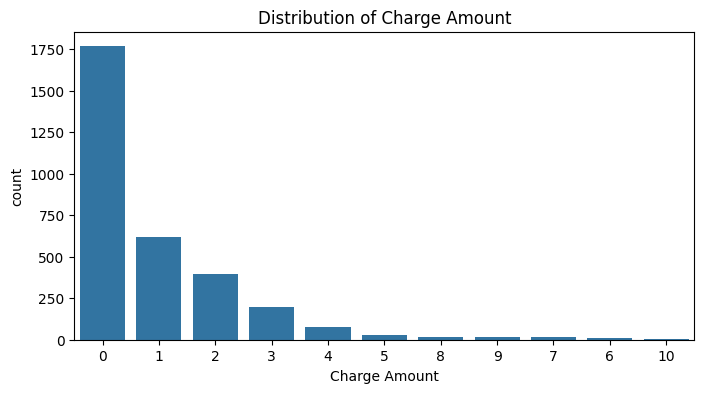

Distribution for Age Group:
Age Group
Adult          1425
Young Adult    1037
Middle-aged     395
Senior          170
Youth           123
Name: count, dtype: int64
Age Group
Adult          45.238095
Young Adult    32.920635
Middle-aged    12.539683
Senior          5.396825
Youth           3.904762
Name: proportion, dtype: float64




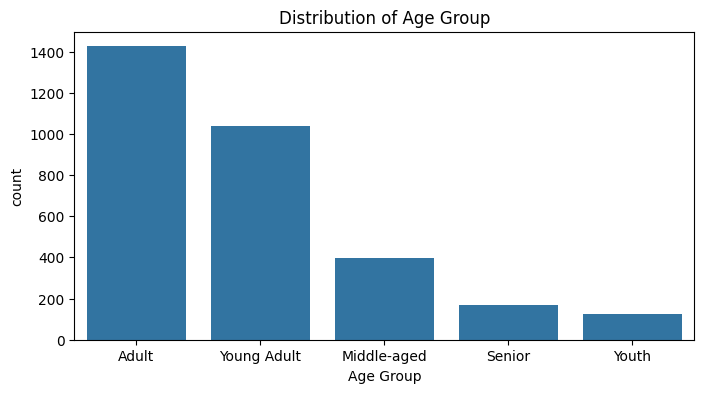

Distribution for Tariff Plan:
Tariff Plan
Pay as you go    2905
Contract          245
Name: count, dtype: int64
Tariff Plan
Pay as you go    92.222222
Contract          7.777778
Name: proportion, dtype: float64




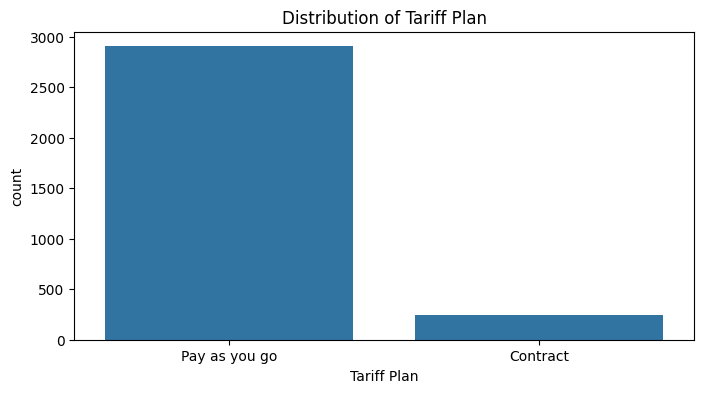

Distribution for Status:
Status
Inactive    2368
Active       782
Name: count, dtype: int64
Status
Inactive    75.174603
Active      24.825397
Name: proportion, dtype: float64




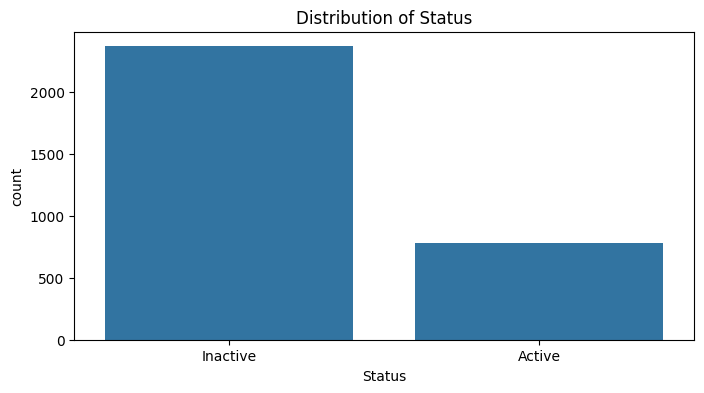

Distribution for Churn:
Churn
Not Churn    2655
Churn         495
Name: count, dtype: int64
Churn
Not Churn    84.285714
Churn        15.714286
Name: proportion, dtype: float64




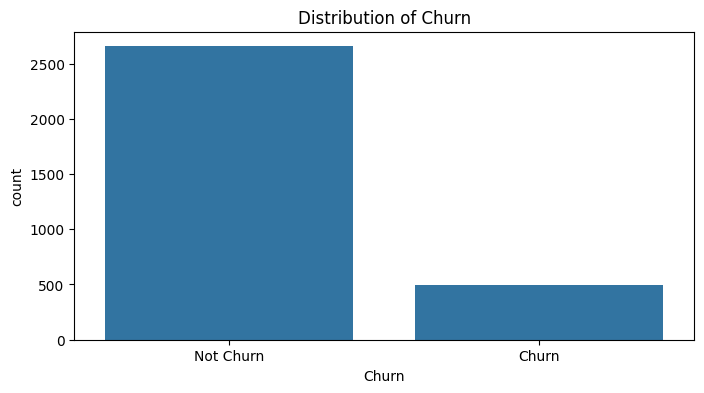

In [ ]:

# Assuming your dataset is loaded into a DataFrame called df
categorical_features = ['Complaints', 'Charge Amount', 'Age Group', 'Tariff Plan', 'Status', 'Churn']

for feature in categorical_features:
    print(f"Distribution for {feature}:")
    print(df[feature].value_counts())  # Counts
    print(df[feature].value_counts(normalize=True) * 100)  # Percentages
    print("\n")

    # Visualization
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


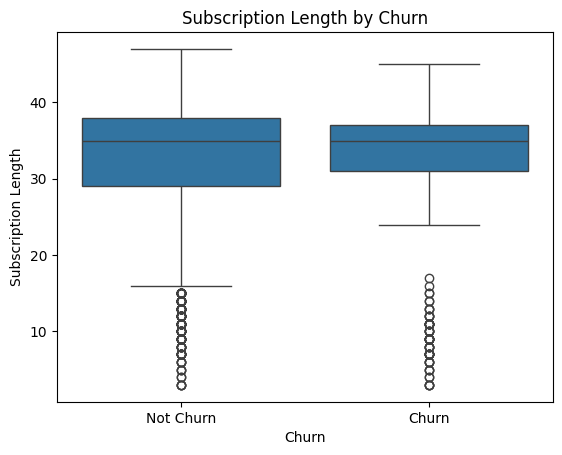

In [ ]:
sns.boxplot(data=df, x='Churn', y='Subscription Length')
plt.title("Subscription Length by Churn")
plt.ylabel("Subscription Length")
plt.show()

/tmp/ipython-input-2215340548.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Call Failure', data=df, palette=['skyblue','orange'])


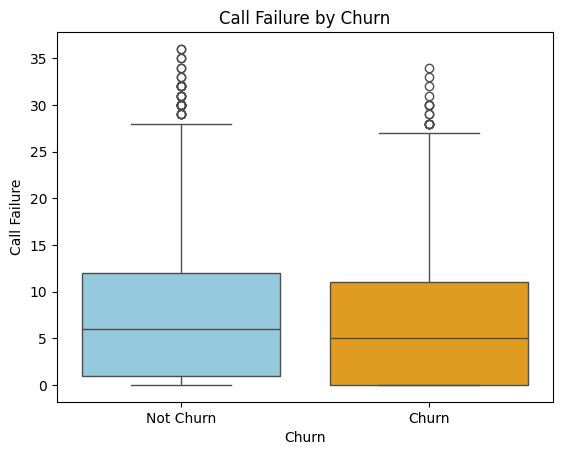

In [ ]:
sns.boxplot(x='Churn', y='Call Failure', data=df, palette=['skyblue','orange'])
plt.title('Call Failure by Churn')
plt.show()


/tmp/ipython-input-2042689944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Seconds of Use', data=df, palette=['skyblue','orange'])


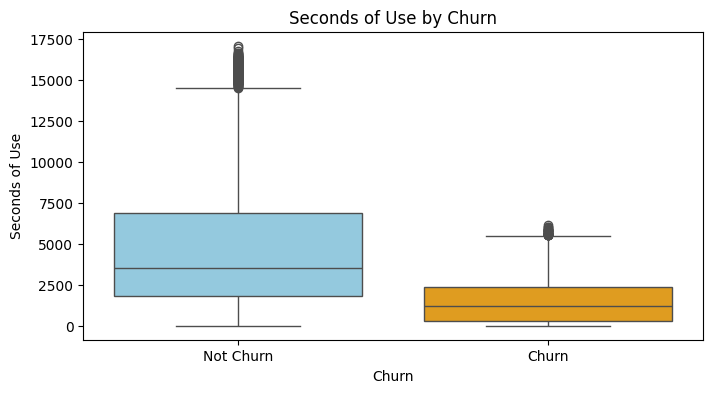

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Seconds of Use', data=df, palette=['skyblue','orange'])
plt.title('Seconds of Use by Churn')
plt.ylabel('Seconds of Use')
plt.show()


/tmp/ipython-input-1227944004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Frequency of SMS', data=df, palette=['skyblue','orange'])


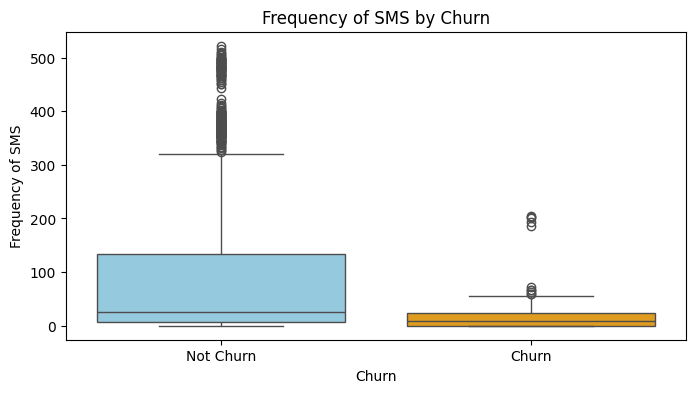

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Frequency of SMS', data=df, palette=['skyblue','orange'])
plt.title('Frequency of SMS by Churn')
plt.ylabel('Frequency of SMS')
plt.show()




/tmp/ipython-input-781710477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Customer Value', data=df, palette=['skyblue','orange'])


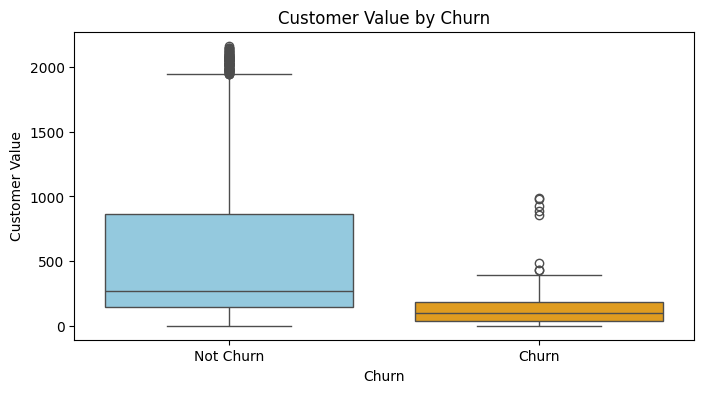

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Customer Value', data=df, palette=['skyblue','orange'])
plt.title('Customer Value by Churn')
plt.ylabel('Customer Value')
plt.show()


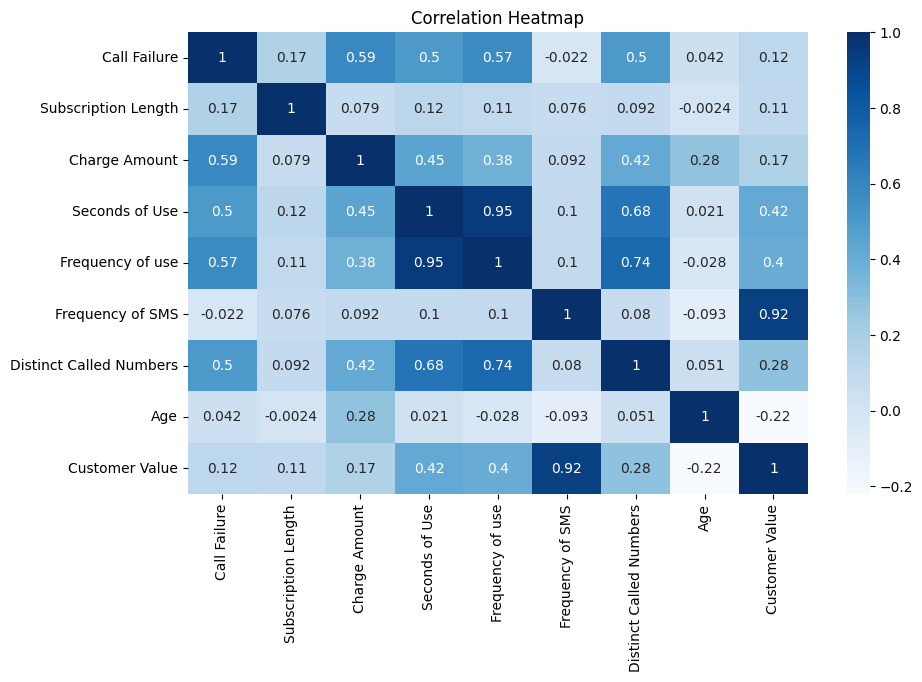

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()
#

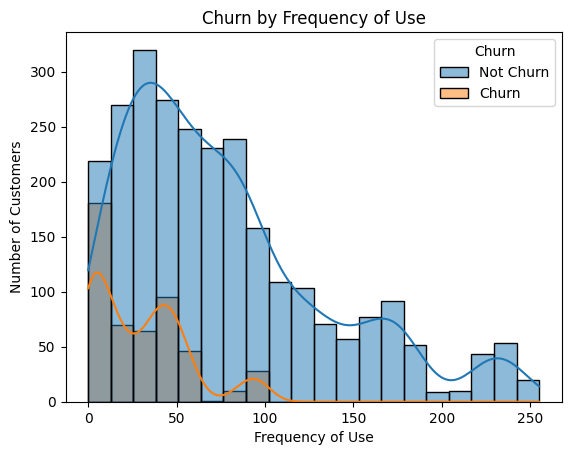

In [ ]:
sns.histplot(data=df, x='Frequency of use', hue='Churn', kde=True, bins=20)
plt.title('Churn by Frequency of Use')
plt.xlabel('Frequency of Use')
plt.ylabel('Number of Customers')
plt.show()

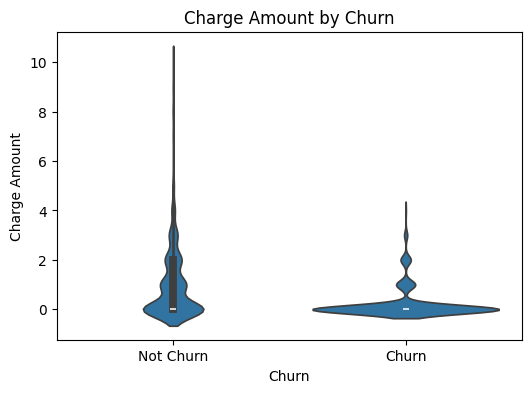

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Churn', y='Charge Amount', data=df)
plt.title("Charge Amount by Churn")
plt.show()

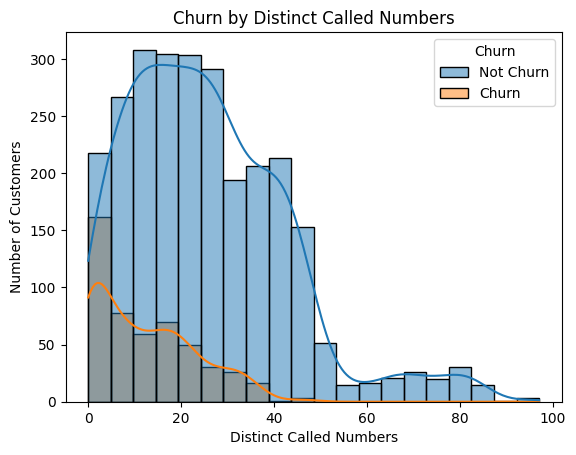

In [ ]:
sns.histplot(data=df, x='Distinct Called Numbers', hue='Churn', kde=True, bins=20)
plt.title('Churn by Distinct Called Numbers')
plt.xlabel('Distinct Called Numbers')
plt.ylabel('Number of Customers')
plt.show()

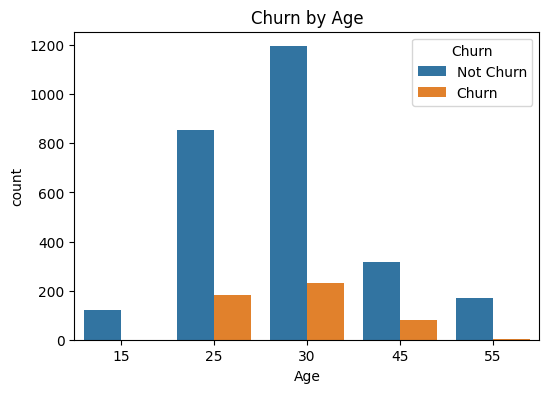

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Age', hue='Churn', data=df)
plt.title('Churn by Age')
plt.show()

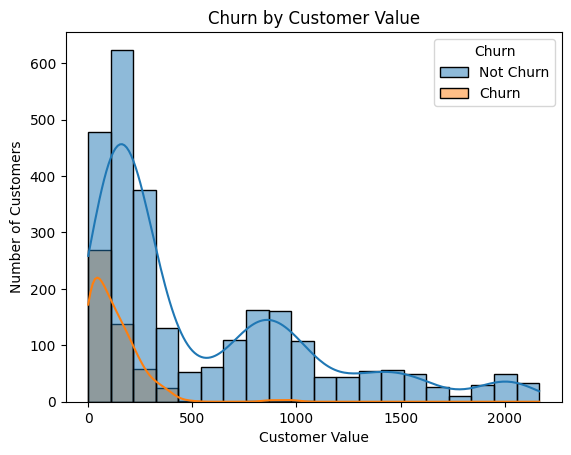

In [ ]:
sns.histplot(data=df, x='Customer Value', hue='Churn', kde=True, bins=20)
plt.title('Churn by Customer Value')
plt.xlabel('Customer Value')
plt.ylabel('Number of Customers')
plt.show()


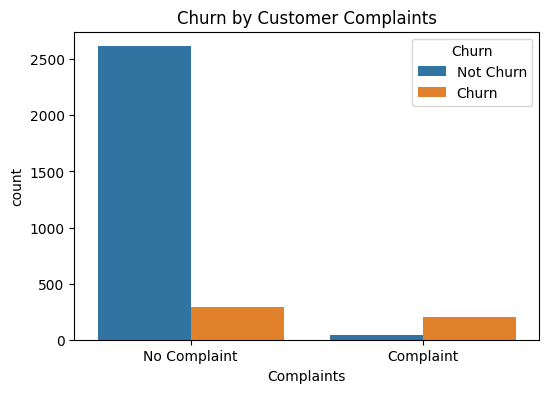

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Complaints', hue= 'Churn', data=df)
plt.title('Churn by Customer Complaints')
plt.show()

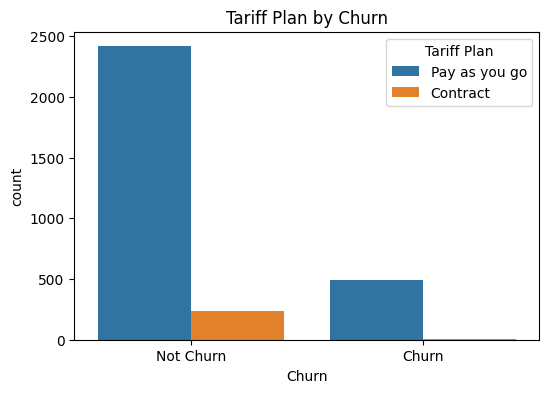

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue= 'Tariff Plan', data=df)
plt.title('Tariff Plan by Churn')
plt.show()

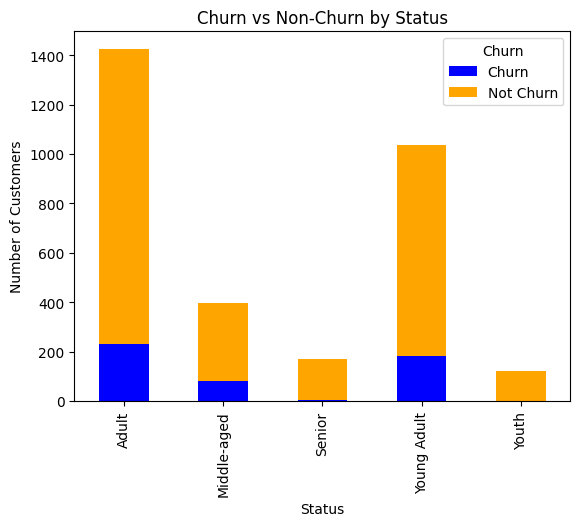

In [ ]:

# Count churn and non-churn per Age Group
counts = df.groupby('Age Group')['Churn'].value_counts().unstack()

# Plot stacked bar chart
counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.ylabel('Number of Customers')
plt.xlabel('Status')
plt.title('Churn vs Non-Churn by Status')
plt.legend(title='Churn')
plt.show()


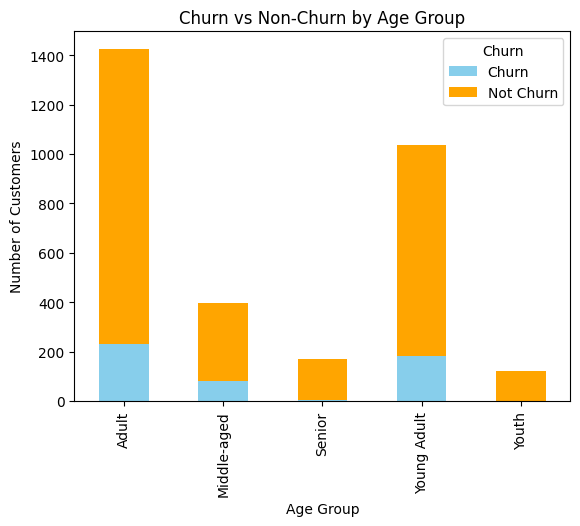

In [ ]:
# Count churn and non-churn per Age Group
counts = df.groupby('Age Group')['Churn'].value_counts().unstack()

# Plot stacked bar chart
counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.title('Churn vs Non-Churn by Age Group')
plt.legend(title='Churn')
plt.show()


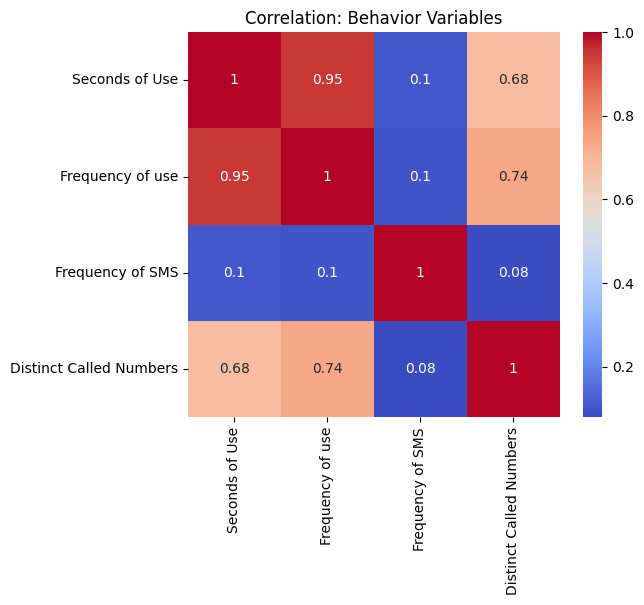

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: behavior group correlation
behavior_vars = ['Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']
corr_behavior = df[behavior_vars].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_behavior, annot=True, cmap='coolwarm')
plt.title('Correlation: Behavior Variables')
plt.show()

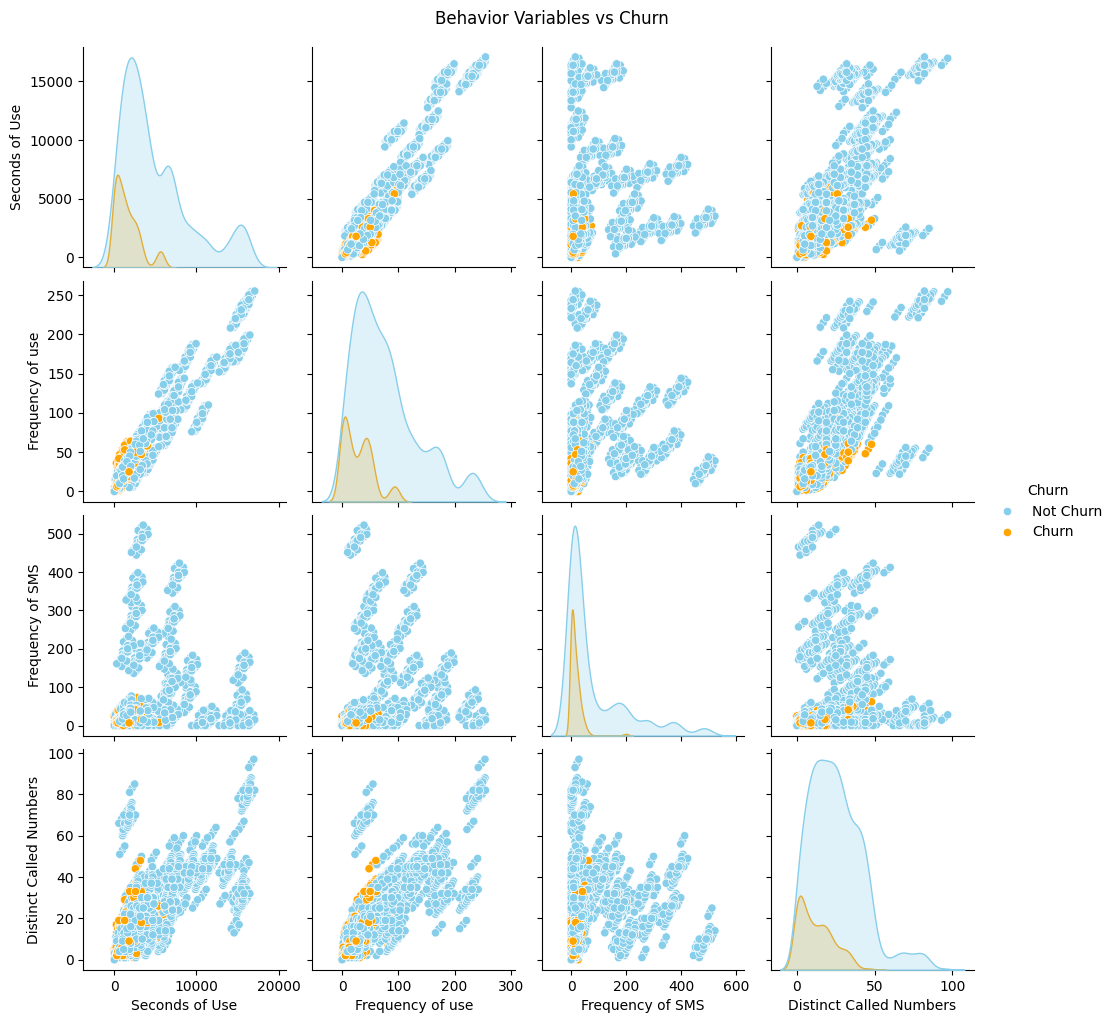

In [ ]:
sns.pairplot(df, vars=behavior_vars, hue='Churn', palette=['skyblue','orange'], diag_kind='kde')
plt.suptitle('Behavior Variables vs Churn', y=1.02)
plt.show()


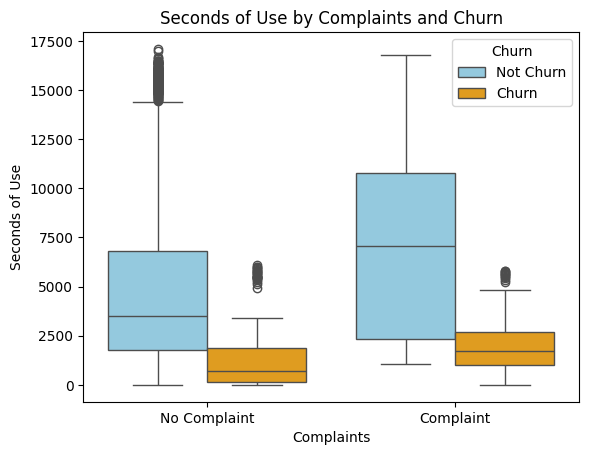

In [ ]:
# High usage (Seconds of Use) by Complaints and Churn
sns.boxplot(x='Complaints', y='Seconds of Use', hue='Churn', data=df, palette=['skyblue','orange'])
plt.title('Seconds of Use by Complaints and Churn')
plt.show()


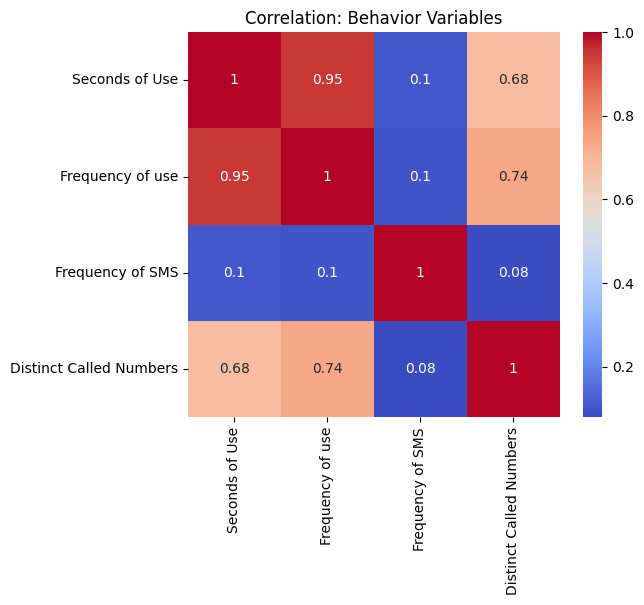

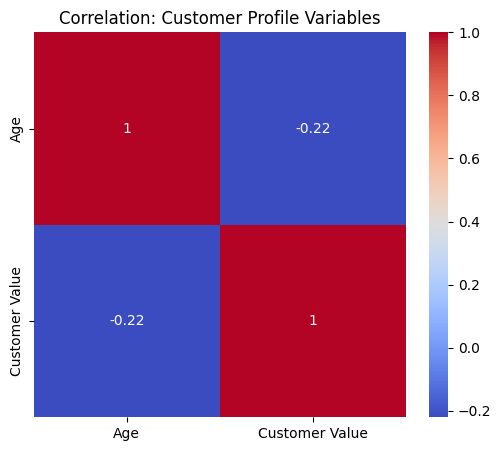

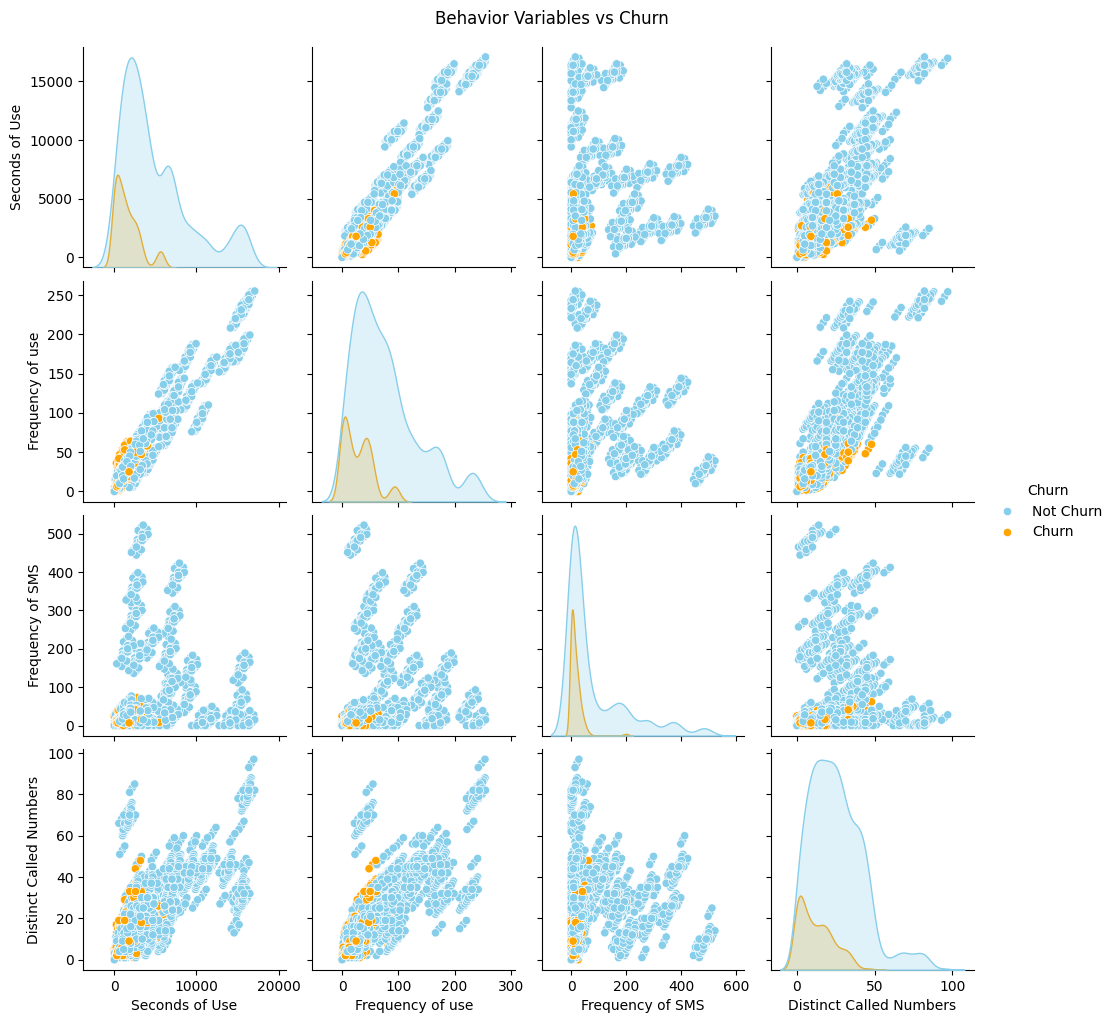

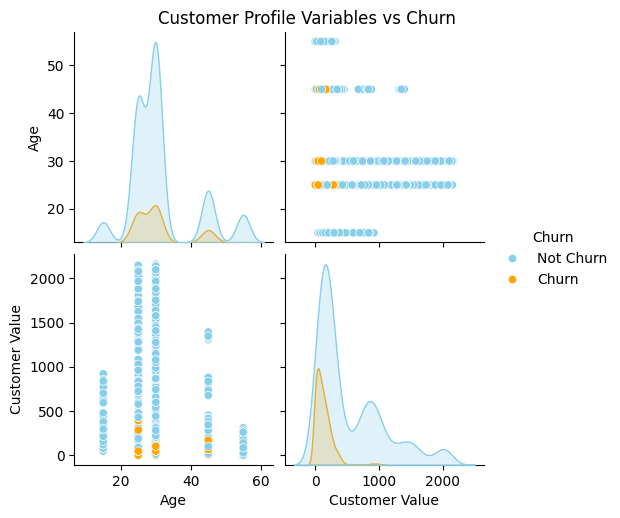

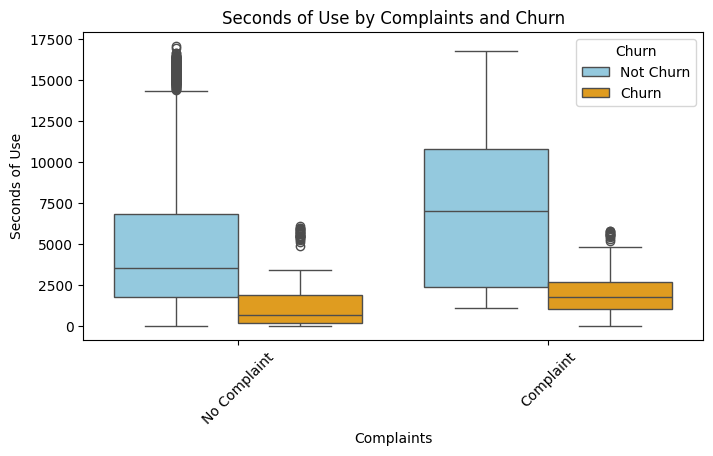

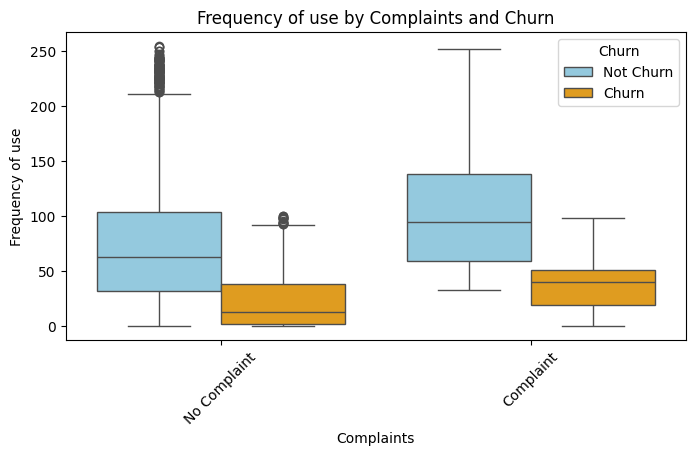

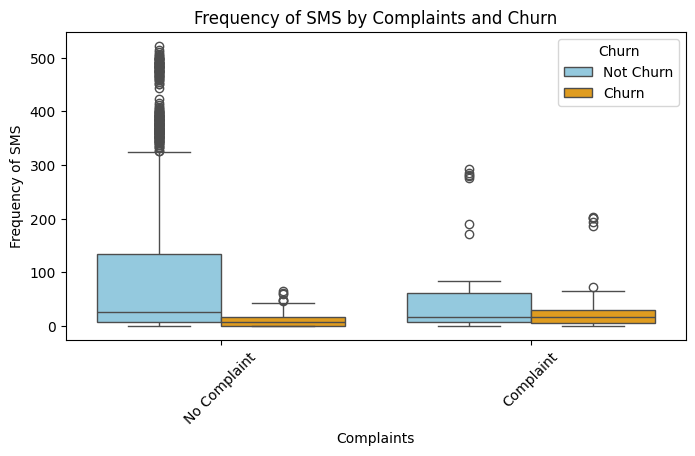

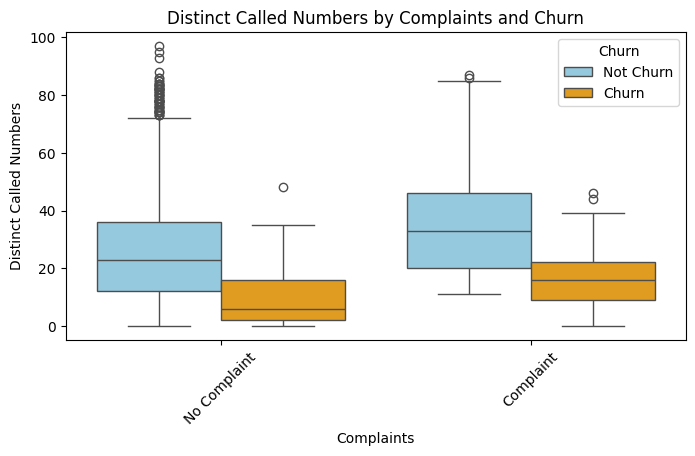

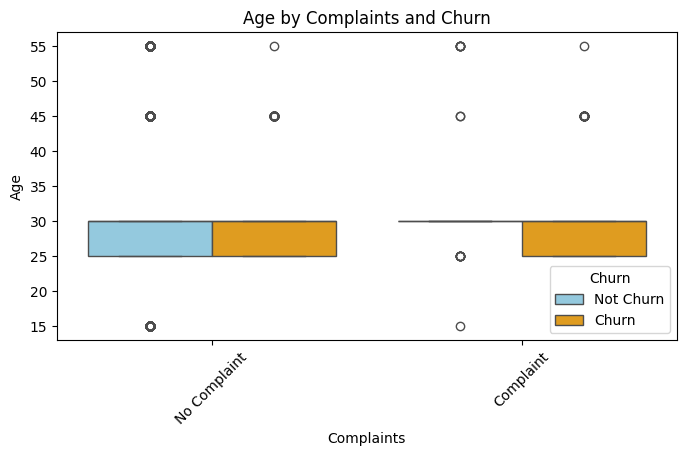

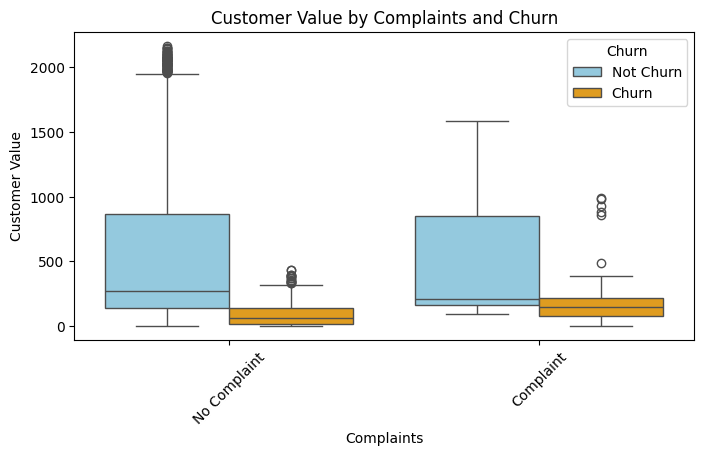

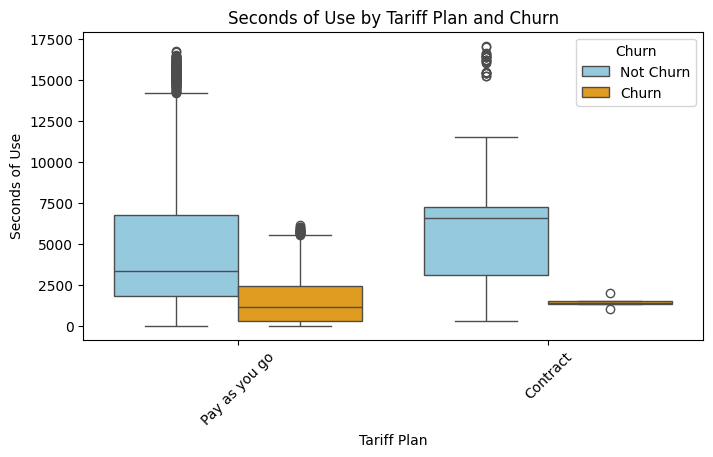

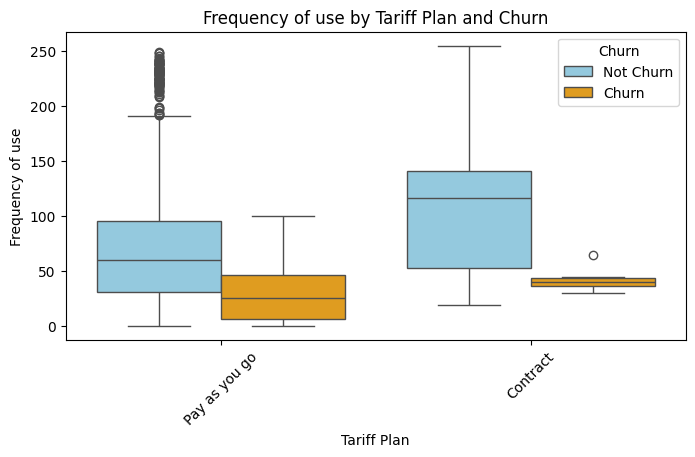

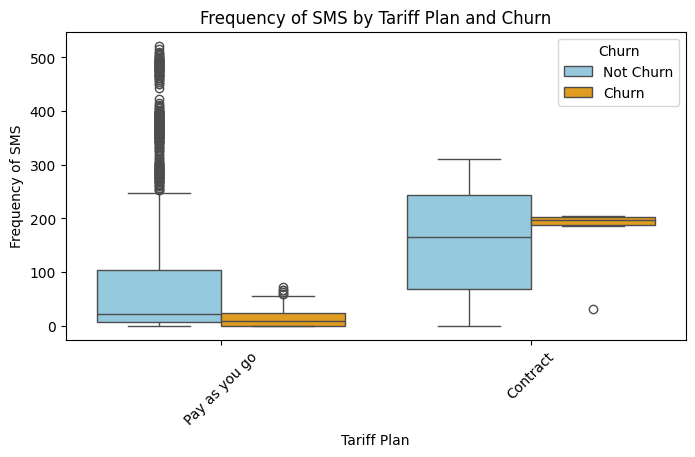

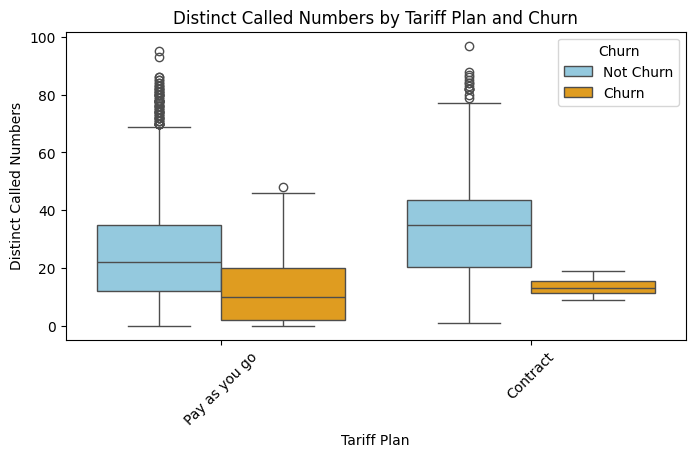

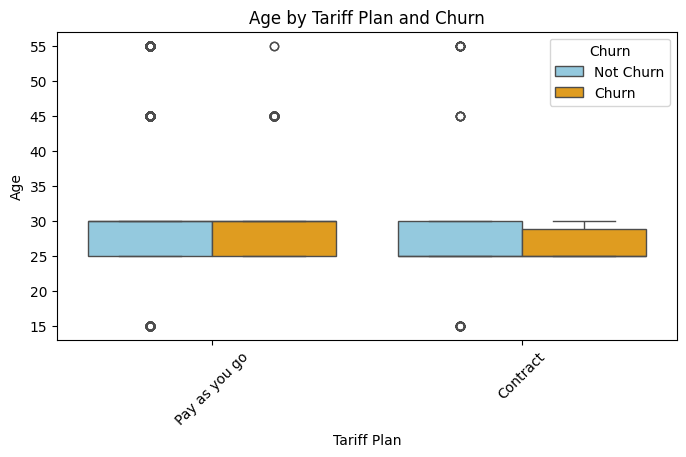

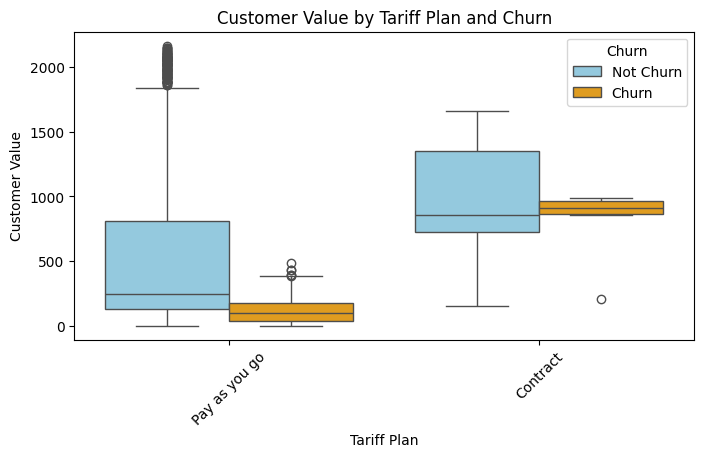

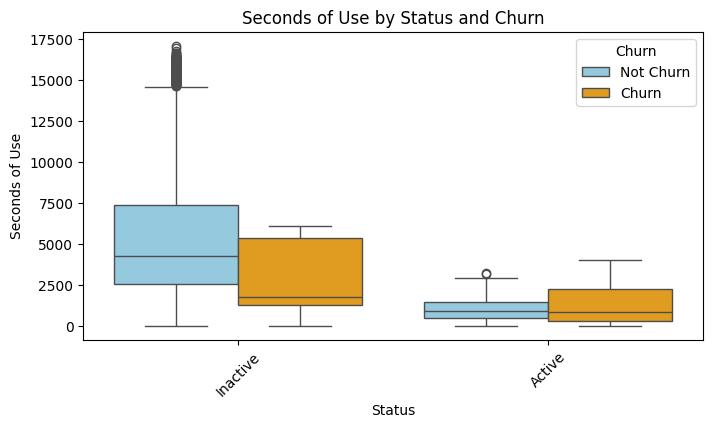

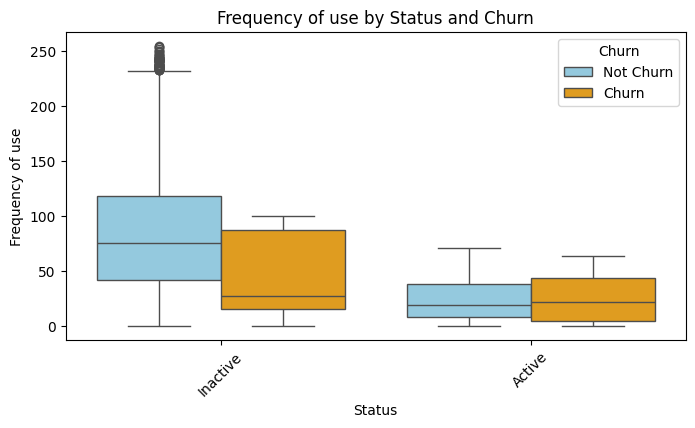

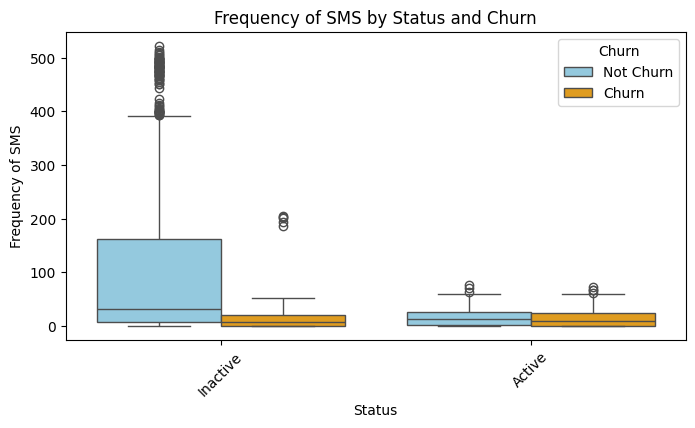

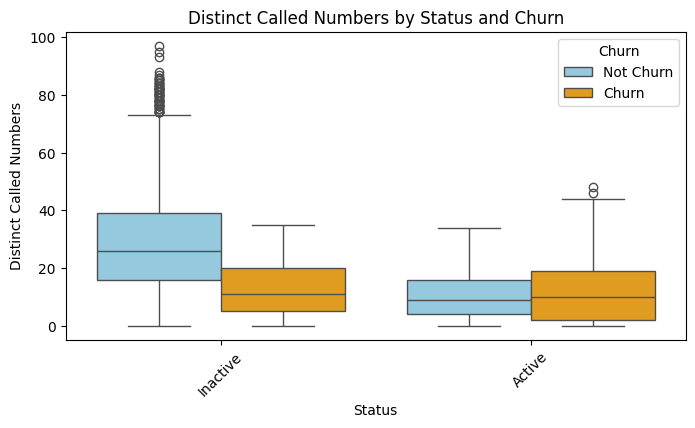

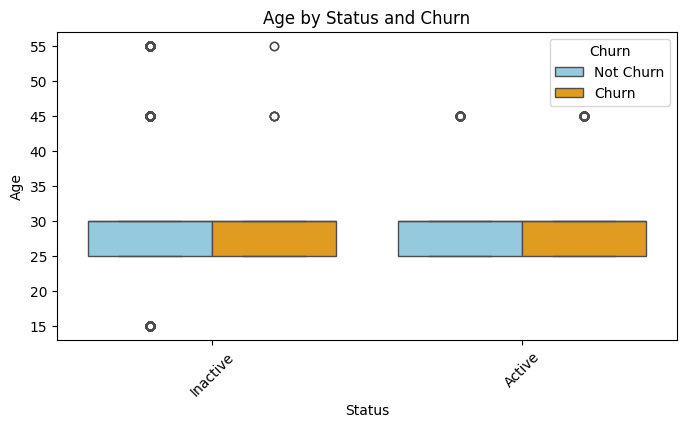

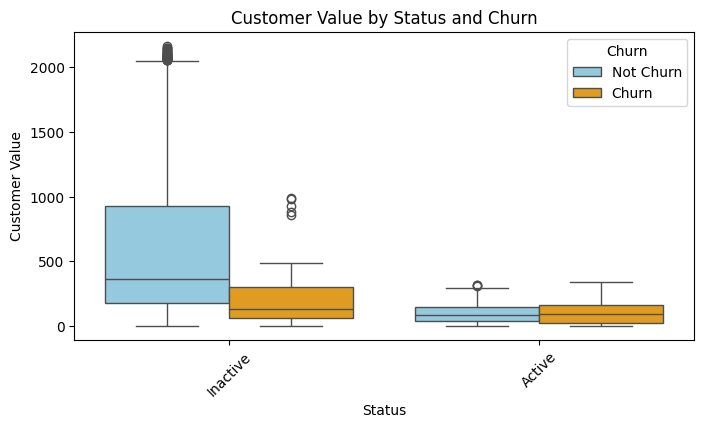

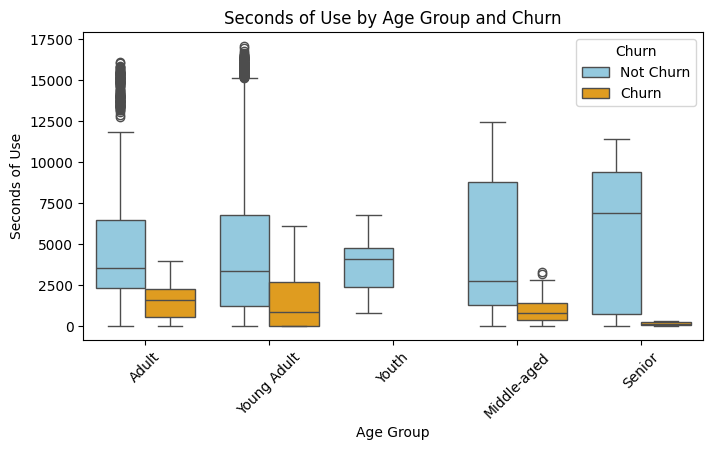

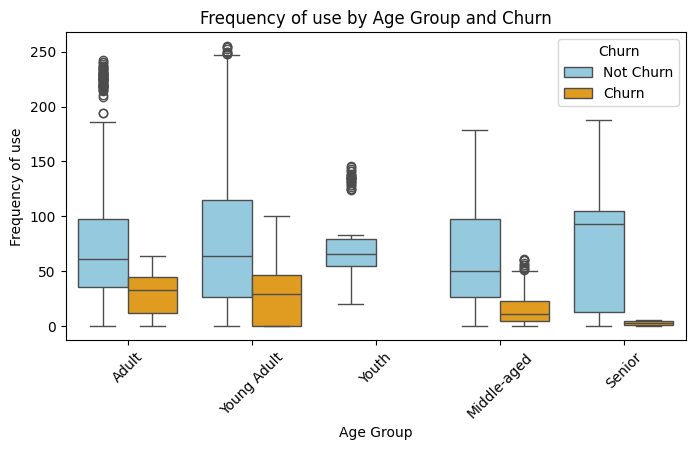

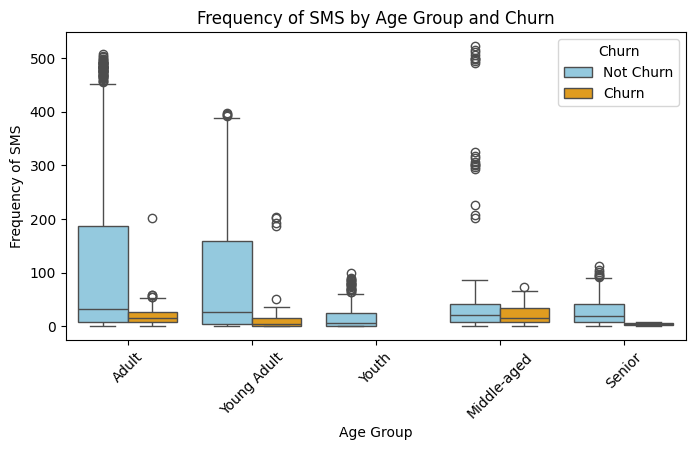

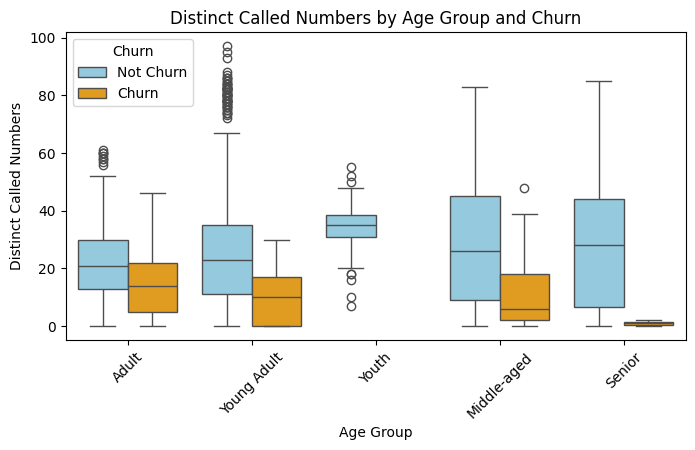

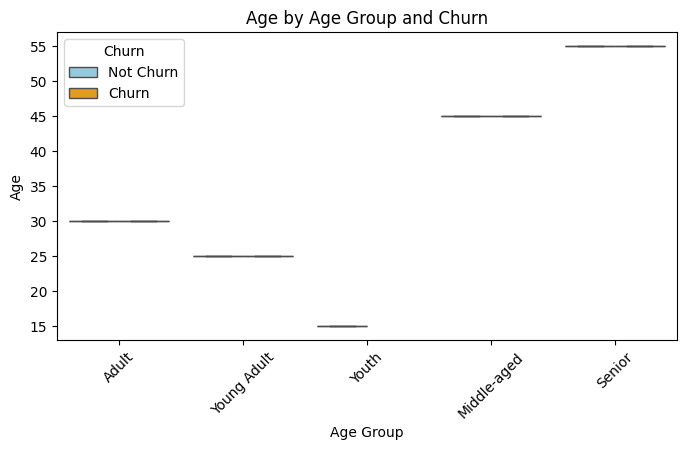

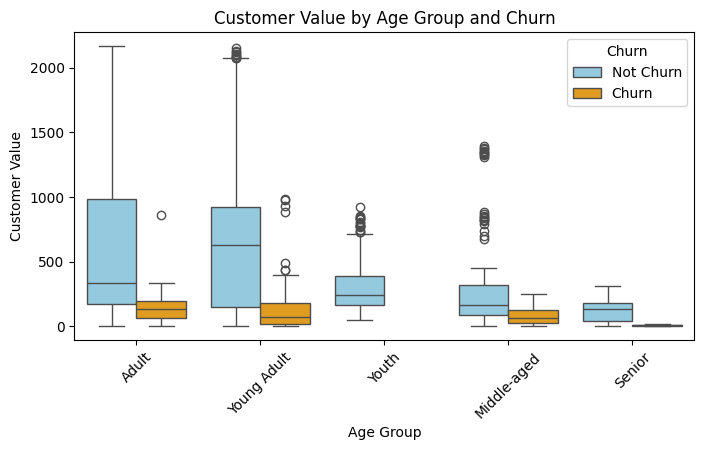

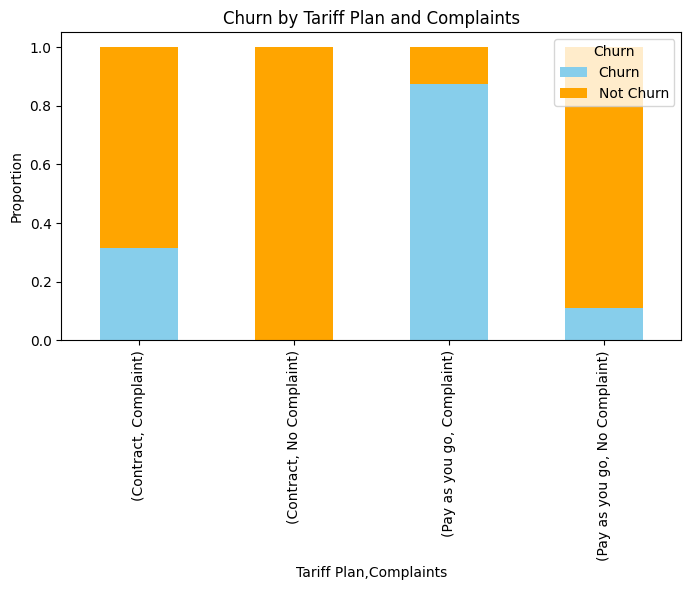

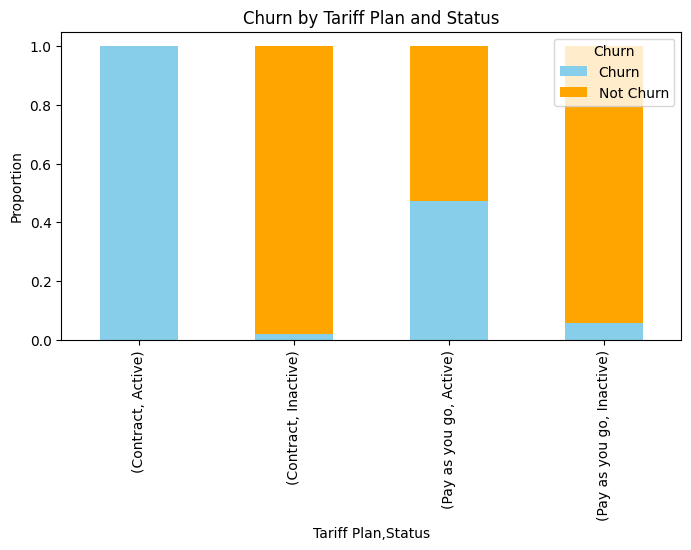

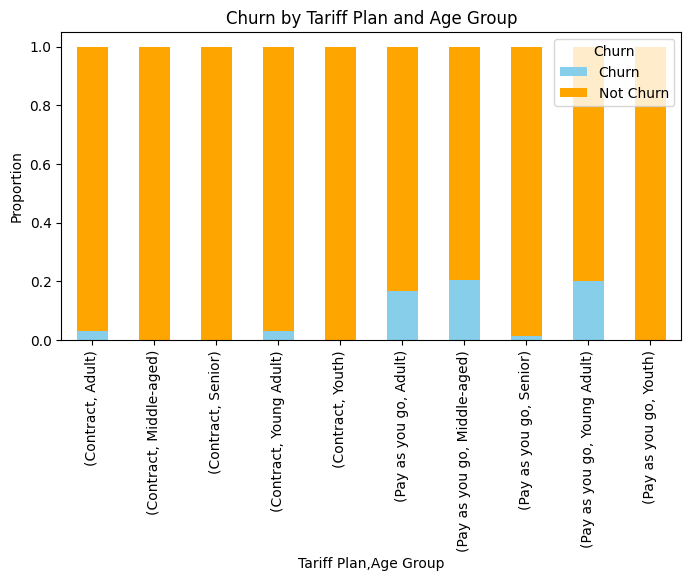

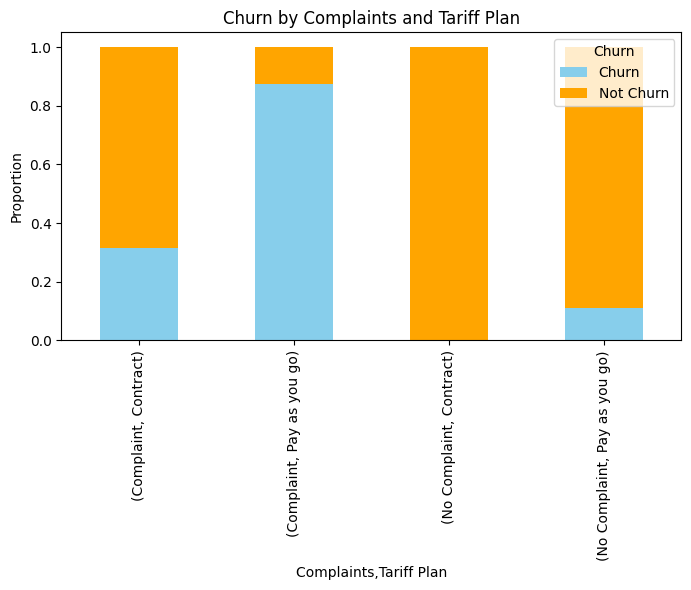

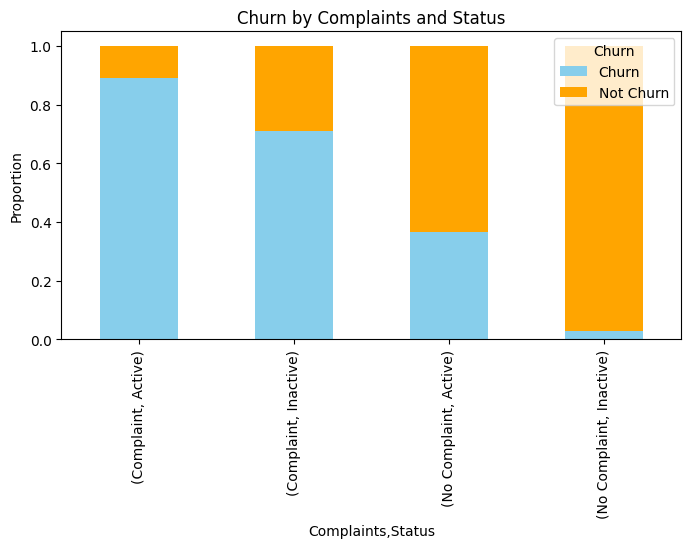

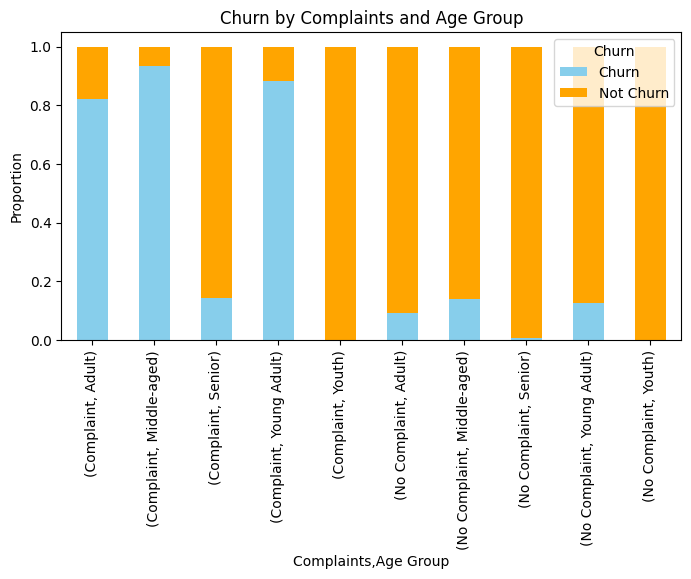

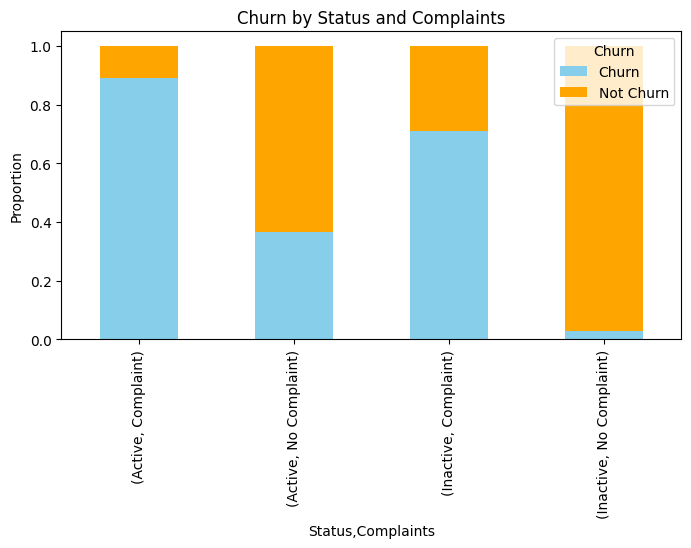

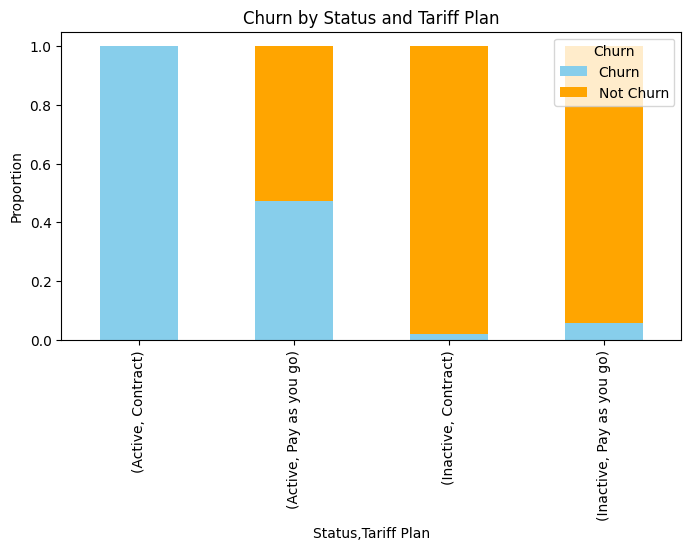

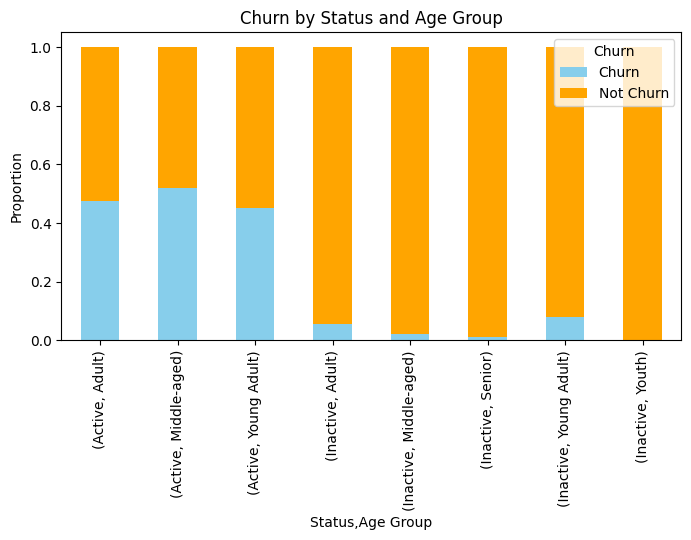

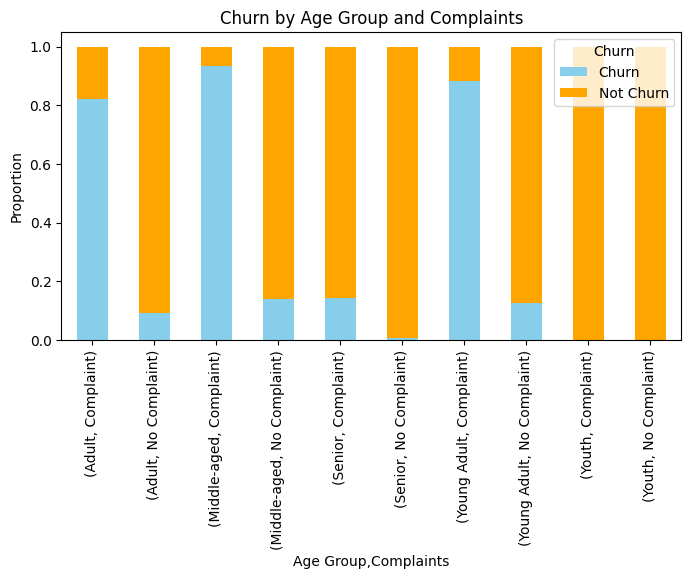

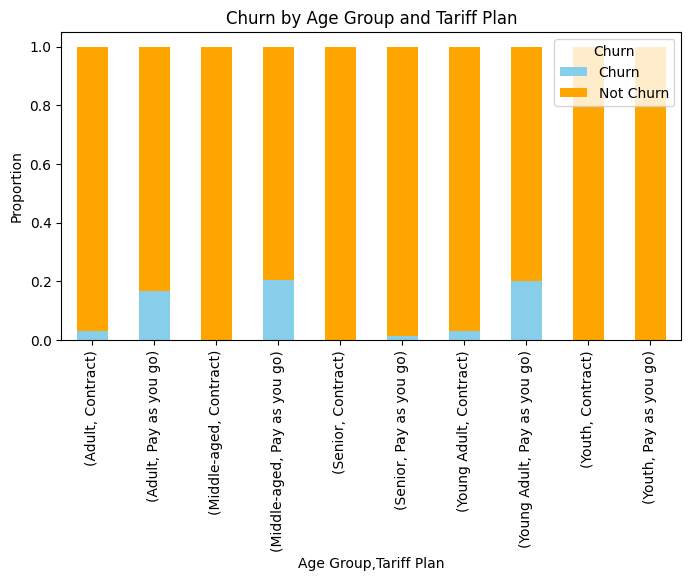

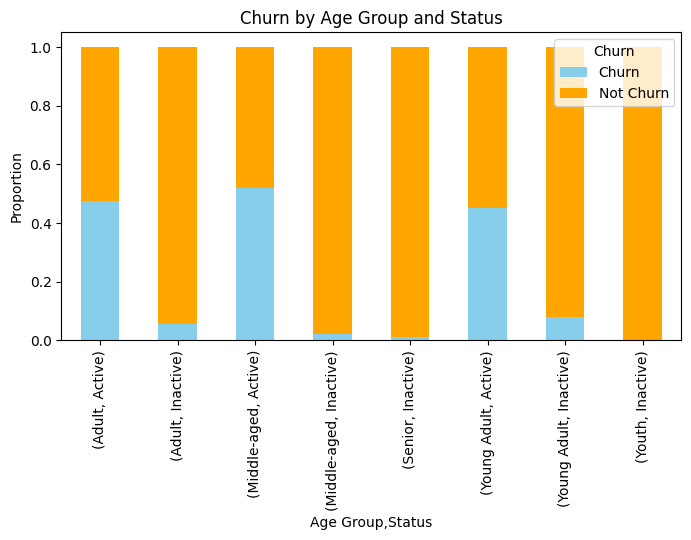

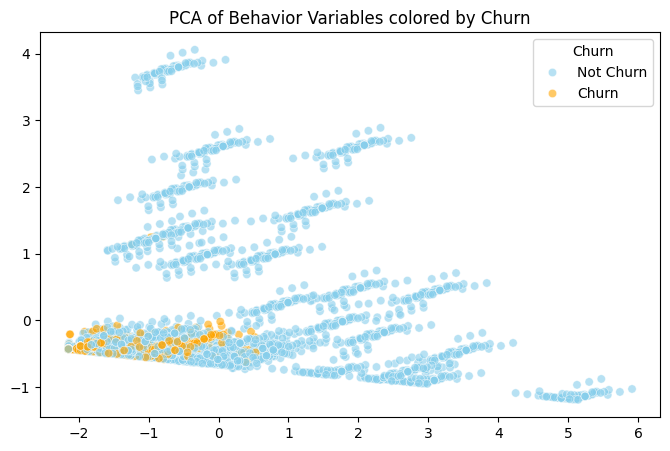

In [ ]:
# Define variable groups
behavior_vars = ['Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']
customer_vars = ['Age', 'Customer Value']
service_vars = ['Complaints', 'Call Failure', 'Tariff Plan', 'Status']

# 1. Correlation Heatmaps (Numerical Groups)

def plot_corr_heatmap(vars_list, title):
    corr = df[vars_list].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

plot_corr_heatmap(behavior_vars, 'Correlation: Behavior Variables')
plot_corr_heatmap(customer_vars, 'Correlation: Customer Profile Variables')

# 2. Pairplots by Churn
sns.pairplot(df, vars=behavior_vars, hue='Churn', palette=['skyblue','orange'], diag_kind='kde')
plt.suptitle('Behavior Variables vs Churn', y=1.02)
plt.show()

sns.pairplot(df, vars=customer_vars, hue='Churn', palette=['skyblue','orange'], diag_kind='kde')
plt.suptitle('Customer Profile Variables vs Churn', y=1.02)
plt.show()

# 3. Boxplots for Mixed Effects (Numerical + Categorical)
for cat_col in ['Complaints', 'Tariff Plan', 'Status', 'Age Group']:
    for num_col in behavior_vars + customer_vars:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat_col, y=num_col, hue='Churn', data=df, palette=['skyblue','orange'])
        plt.title(f'{num_col} by {cat_col} and Churn')
        plt.xticks(rotation=45)
        plt.show()

# 4. Stacked Bar Charts for Categorical Interactions

for col1 in ['Tariff Plan', 'Complaints', 'Status', 'Age Group']:
    for col2 in ['Complaints', 'Tariff Plan', 'Status', 'Age Group']:
        if col1 != col2:
            cross = pd.crosstab([df[col1], df[col2]], df['Churn'], normalize='index')
            cross.plot(kind='bar', stacked=True, figsize=(8,4), color=['skyblue','orange'])
            plt.ylabel('Proportion')
            plt.title(f'Churn by {col1} and {col2}')
            plt.show()

# 5. Optional: PCA on Behavior Variables
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

behavior_scaled = StandardScaler().fit_transform(df[behavior_vars])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(behavior_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Churn'], palette=['skyblue','orange'], alpha=0.6)
plt.title('PCA of Behavior Variables colored by Churn')
plt.show()


/tmp/ipython-input-1283678115.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Tenure_Bucket')['Churn'].apply(lambda x: (x=='churn').mean())


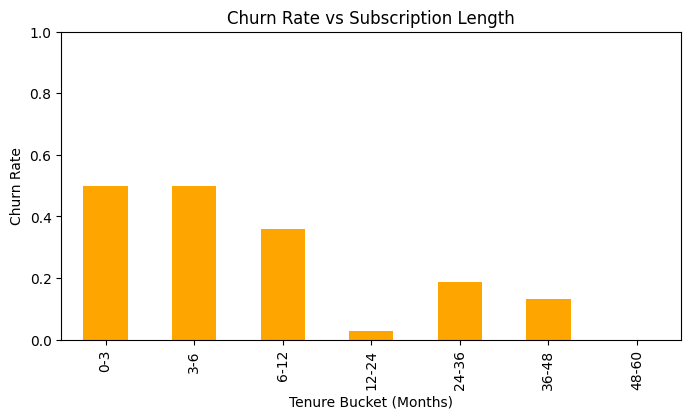

In [ ]:
# Example: Subscription Length in months
tenure_bins = [0, 3, 6, 12, 24, 36, 48, 60]  # Adjust as needed
tenure_labels = ['0-3', '3-6', '6-12', '12-24', '24-36', '36-48', '48-60']
df['Tenure_Bucket'] = pd.cut(df['Subscription Length'], bins=tenure_bins, labels=tenure_labels)

churn_rate = df.groupby('Tenure_Bucket')['Churn'].apply(lambda x: (x=='churn').mean())

plt.figure(figsize=(8,4))
churn_rate.plot(kind='bar', color='orange')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Bucket (Months)')
plt.title('Churn Rate vs Subscription Length')
plt.ylim(0,1)
plt.show()


/tmp/ipython-input-3947885451.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_trends = df.groupby('Tenure_Bucket')[usage_vars].mean()


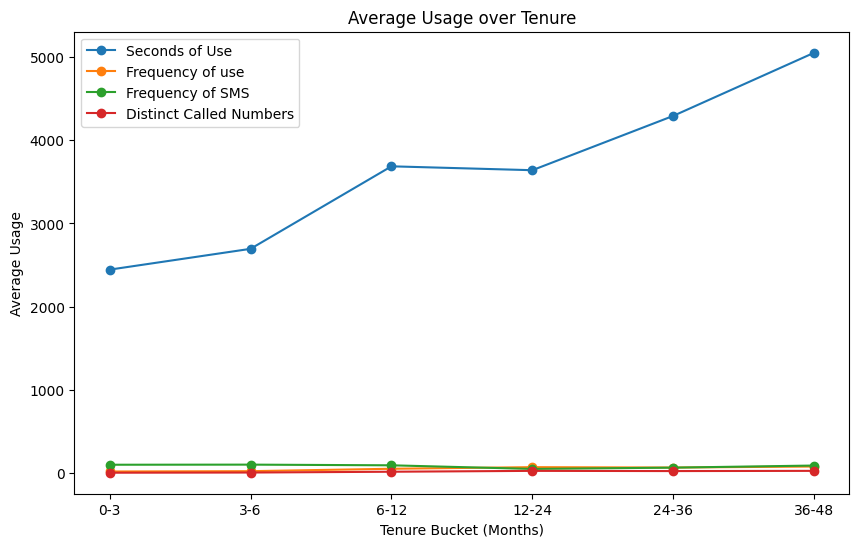

In [ ]:
usage_vars = ['Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers']
usage_trends = df.groupby('Tenure_Bucket')[usage_vars].mean()

plt.figure(figsize=(10,6))
for col in usage_vars:
    plt.plot(usage_trends.index, usage_trends[col], marker='o', label=col)

plt.xlabel('Tenure Bucket (Months)')
plt.ylabel('Average Usage')
plt.title('Average Usage over Tenure')
plt.legend()
plt.show()

In [ ]:
# Example thresholds: adjust based on dataset distribution
usage_threshold = df['Seconds of Use'].median()
value_threshold = df['Customer Value'].median()
tenure_threshold = df['Subscription Length'].median()

# High usage, high value, long tenure
df['Segment_HighUsage_HighValue_LongTenure'] = (
    (df['Seconds of Use'] >= usage_threshold) &
    (df['Customer Value'] >= value_threshold) &
    (df['Subscription Length'] >= tenure_threshold)
).map({True: 'HighUsage_HighValue_LongTenure', False: 'Other'})

# Low usage, low value, short tenure
df['Segment_LowUsage_LowValue_ShortTenure'] = (
    (df['Seconds of Use'] < usage_threshold) &
    (df['Customer Value'] < value_threshold) &
    (df['Subscription Length'] < tenure_threshold)
).map({True: 'LowUsage_LowValue_ShortTenure', False: 'Other'})

# High complaints + high call failure
df['Segment_HighComplaints_HighCallFailure'] = (
    (df['Complaints'] == 'complaint') &
    (df['Call Failure'] > df['Call Failure'].median())
).map({True: 'HighComplaints_HighCallFailure', False: 'Other'})

# Young vs older subscribers
df['Segment_AgeGroup'] = df['Age Group'].replace({
    'teen': 'Young', 'young adult': 'Young',
    'adult': 'Older', 'middle age': 'Older', 'senior': 'Older'
})

# Tariff Plan
df['Segment_TariffPlan'] = df['Tariff Plan']


In [ ]:
segments = [
    'Segment_HighUsage_HighValue_LongTenure',
    'Segment_LowUsage_LowValue_ShortTenure',
    'Segment_HighComplaints_HighCallFailure',
    'Segment_AgeGroup',
    'Segment_TariffPlan'
]

for seg in segments:
    summary = df.groupby(seg).agg(
        Churn_Rate = ('Churn', lambda x: (x=='churn').mean()),
        Avg_Customer_Value = ('Customer Value', 'mean'),
        Avg_Seconds_of_Use = ('Seconds of Use', 'mean'),
        Avg_Frequency_of_Use = ('Frequency of use', 'mean'),
        Avg_Frequency_of_SMS = ('Frequency of SMS', 'mean')
    ).sort_values('Churn_Rate', ascending=False)

    print(f'\n--- Segment Analysis: {seg} ---\n')
    print(summary)



--- Segment Analysis: Segment_HighUsage_HighValue_LongTenure ---

                                        Churn_Rate  Avg_Customer_Value  \
Segment_HighUsage_HighValue_LongTenure                                   
HighUsage_HighValue_LongTenure                 0.0          819.320303   
Other                                          0.0          360.393381   

                                        Avg_Seconds_of_Use  \
Segment_HighUsage_HighValue_LongTenure                       
HighUsage_HighValue_LongTenure                 8250.223979   
Other                                          3273.244668   

                                        Avg_Frequency_of_Use  \
Segment_HighUsage_HighValue_LongTenure                         
HighUsage_HighValue_LongTenure                    118.334651   
Other                                              53.946048   

                                        Avg_Frequency_of_SMS  
Segment_HighUsage_HighValue_LongTenure                        
High

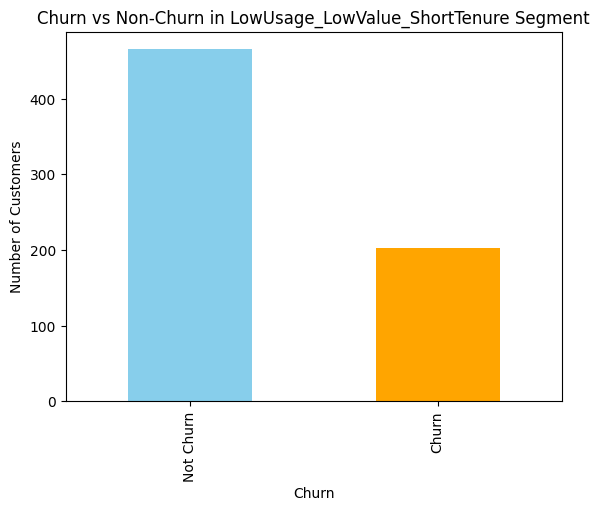

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the specific segment
segment_df = df[df['Segment_LowUsage_LowValue_ShortTenure'] == 'LowUsage_LowValue_ShortTenure']

churn_counts = segment_df['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['skyblue','orange'])
plt.title('Churn vs Non-Churn in LowUsage_LowValue_ShortTenure Segment')
plt.ylabel('Number of Customers')
plt.show()


Metrics by Age Group:
                  Customers  Churn_Rate  Avg_Customer_Value  \
Segment_AgeGroup                                              
Adult                  1425         0.0          541.435116   
Middle-aged             395         0.0          207.699177   
Senior                  170         0.0          126.214853   
Young Adult            1037         0.0          547.126707   
Youth                   123         0.0          334.565447   

                  Avg_Seconds_of_Use  Avg_Frequency_of_Use  
Segment_AgeGroup                                            
Adult                    4463.154386             68.442807  
Middle-aged              4042.088608             60.562025  
Senior                   5512.094118             77.523529  
Young Adult              4536.344262             72.075217  
Youth                    3986.853659             76.642276  


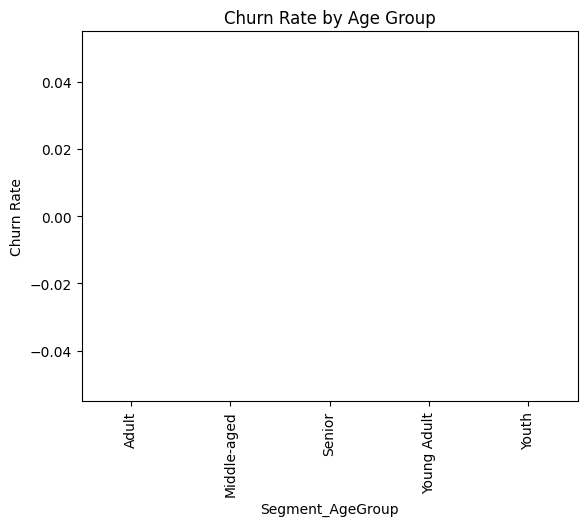

In [ ]:
# Group by Age Segment
age_groups = df.groupby('Segment_AgeGroup').agg(
    Customers=('Churn','count'),
    Churn_Rate=('Churn', lambda x: (x=='churn').mean()),
    Avg_Customer_Value=('Customer Value','mean'),
    Avg_Seconds_of_Use=('Seconds of Use','mean'),
    Avg_Frequency_of_Use=('Frequency of use','mean')
)
print("Metrics by Age Group:")
print(age_groups)

# Churn Bar Chart by Age Group
age_groups['Churn_Rate'].plot(kind='bar', color='orange', title='Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.show()


--- Segment Analysis: Segment_LowUsage_LowValue_ShortTenure ---

                                       Customers  Churn_Rate  \
Segment_LowUsage_LowValue_ShortTenure                          
LowUsage_LowValue_ShortTenure                668         0.0   
Other                                       2482         0.0   

                                       Avg_Customer_Value  Avg_Seconds of Use  \
Segment_LowUsage_LowValue_ShortTenure                                           
LowUsage_LowValue_ShortTenure                   89.123361         1240.245509   
Other                                          573.743062         5342.370669   

                                       Avg_Frequency of use  \
Segment_LowUsage_LowValue_ShortTenure                         
LowUsage_LowValue_ShortTenure                     23.748503   
Other                                             81.763497   

                                       Avg_Frequency of SMS  
Segment_LowUsage_LowValue_ShortTenure

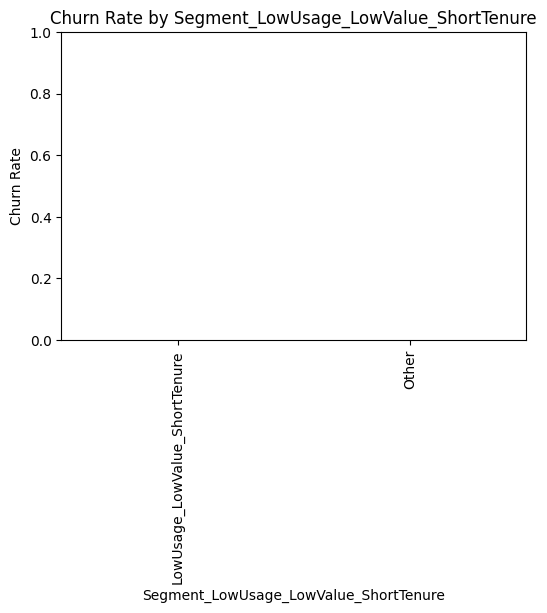

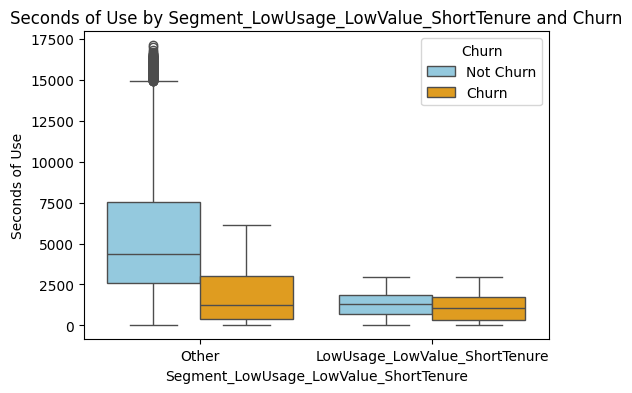

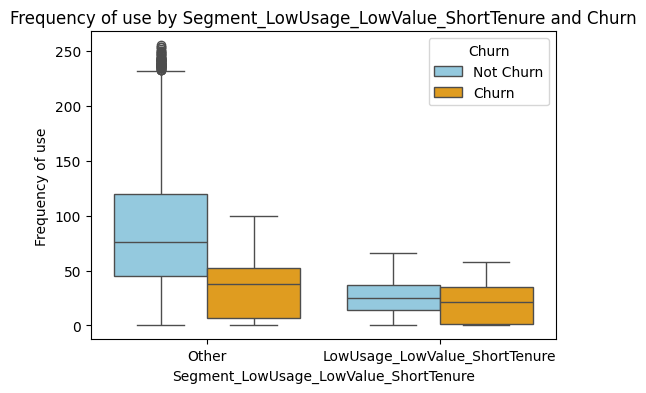

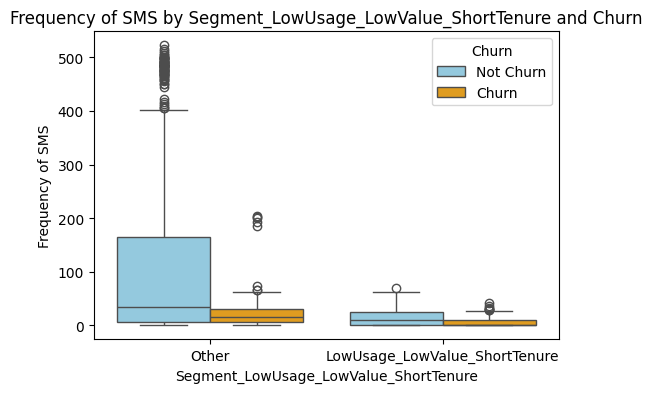


--- Segment Analysis: Segment_HighComplaints_HighCallFailure ---

                                        Customers  Churn_Rate  \
Segment_HighComplaints_HighCallFailure                          
Other                                        3150         0.0   

                                        Avg_Customer_Value  \
Segment_HighComplaints_HighCallFailure                       
Other                                           470.972916   

                                        Avg_Seconds of Use  \
Segment_HighComplaints_HighCallFailure                       
Other                                          4472.459683   

                                        Avg_Frequency of use  \
Segment_HighComplaints_HighCallFailure                         
Other                                              69.460635   

                                        Avg_Frequency of SMS  
Segment_HighComplaints_HighCallFailure                        
Other                                       

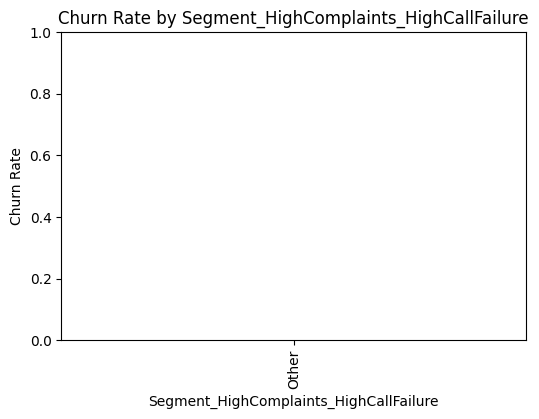

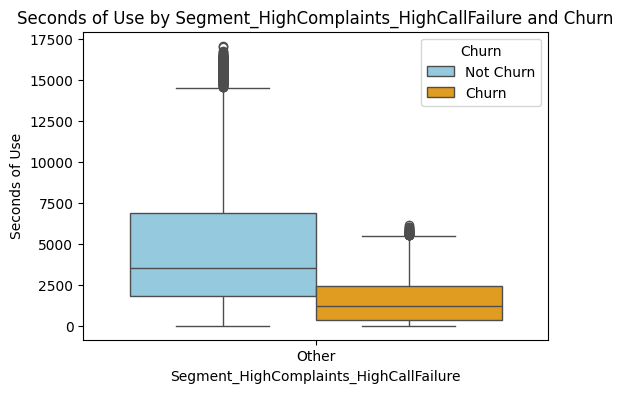

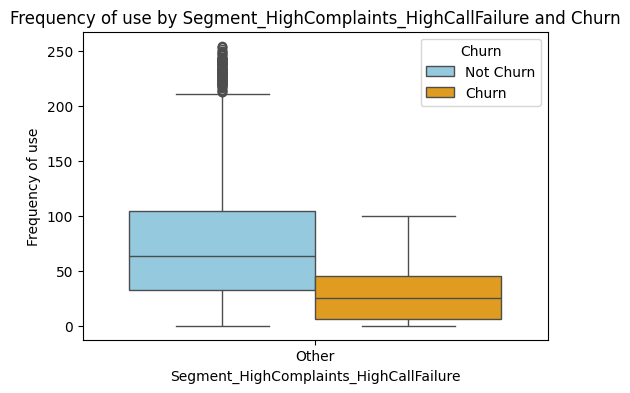

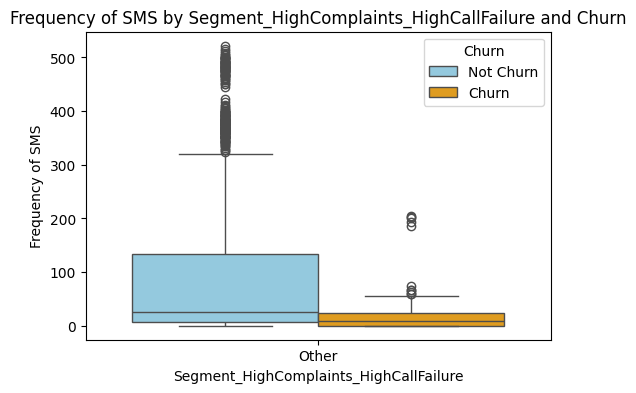


--- Segment Analysis: Segment_AgeGroup ---

                  Customers  Churn_Rate  Avg_Customer_Value  \
Segment_AgeGroup                                              
Adult                  1425         0.0          541.435116   
Middle-aged             395         0.0          207.699177   
Senior                  170         0.0          126.214853   
Young Adult            1037         0.0          547.126707   
Youth                   123         0.0          334.565447   

                  Avg_Seconds of Use  Avg_Frequency of use  \
Segment_AgeGroup                                             
Adult                    4463.154386             68.442807   
Middle-aged              4042.088608             60.562025   
Senior                   5512.094118             77.523529   
Young Adult              4536.344262             72.075217   
Youth                    3986.853659             76.642276   

                  Avg_Frequency of SMS  
Segment_AgeGroup                     

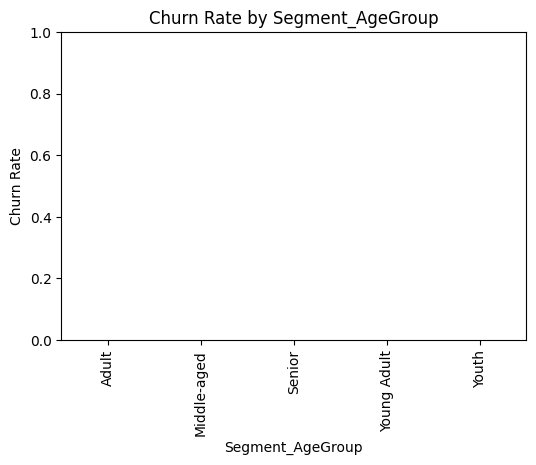

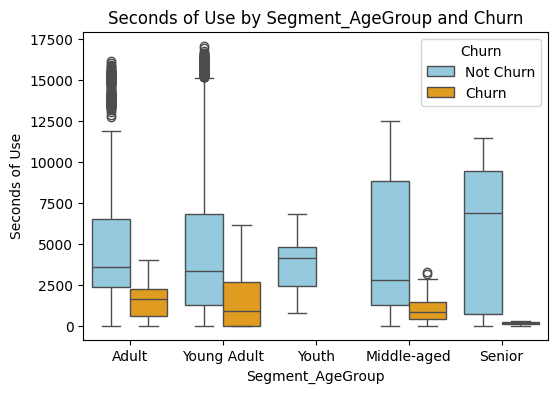

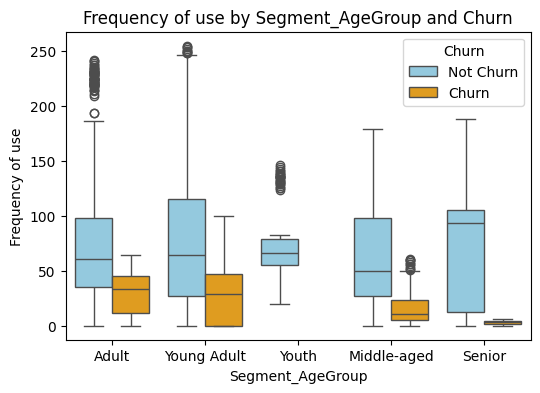

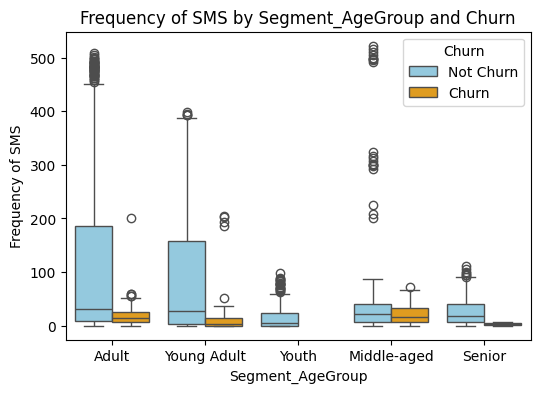


--- Segment Analysis: Segment_TariffPlan ---

                    Customers  Churn_Rate  Avg_Customer_Value  \
Segment_TariffPlan                                              
Contract                  245         0.0          920.067571   
Pay as you go            2905         0.0          433.097463   

                    Avg_Seconds of Use  Avg_Frequency of use  \
Segment_TariffPlan                                             
Contract                   6403.261224            110.269388   
Pay as you go              4309.620998             66.018933   

                    Avg_Frequency of SMS  
Segment_TariffPlan                        
Contract                      148.791837  
Pay as you go                  66.797590  


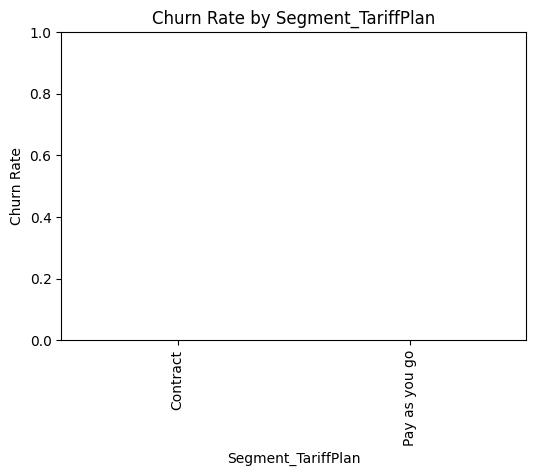

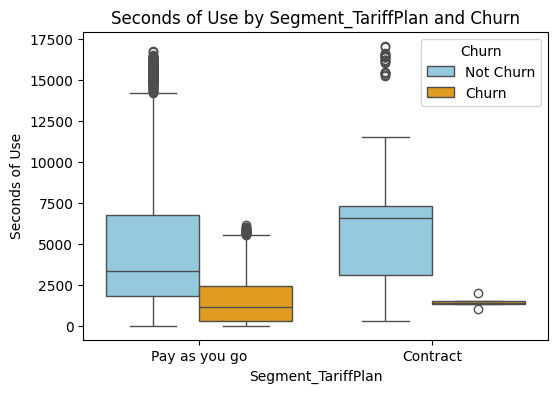

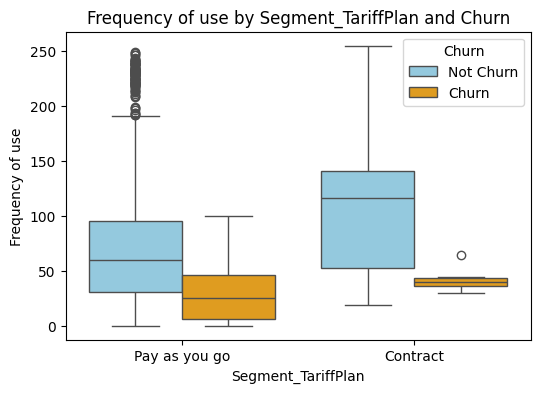

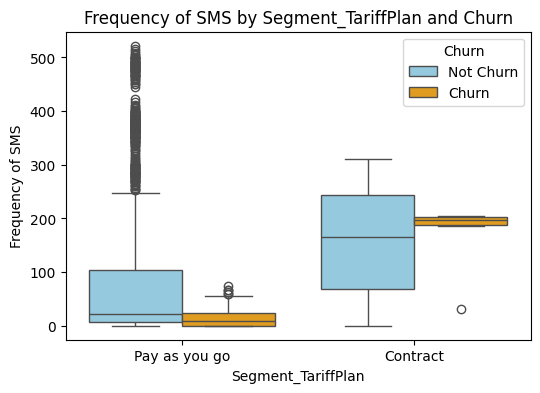

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Define thresholds for segmentation
# -------------------------------
usage_threshold = df['Seconds of Use'].median()
value_threshold = df['Customer Value'].median()
tenure_threshold = df['Subscription Length'].median()
call_failure_threshold = df['Call Failure'].median()

# -------------------------------
# 2. Create segments
# -------------------------------
df['Segment_LowUsage_LowValue_ShortTenure'] = (
    (df['Seconds of Use'] < usage_threshold) &
    (df['Customer Value'] < value_threshold) &
    (df['Subscription Length'] < tenure_threshold)
).map({True: 'LowUsage_LowValue_ShortTenure', False: 'Other'})

df['Segment_HighComplaints_HighCallFailure'] = (
    (df['Complaints'] == 'complaint') &
    (df['Call Failure'] > call_failure_threshold)
).map({True: 'HighComplaints_HighCallFailure', False: 'Other'})

df['Segment_AgeGroup'] = df['Age Group'].replace({
    'teen': 'Young', 'young adult': 'Young',
    'adult': 'Older', 'middle age': 'Older', 'senior': 'Older'
})

df['Segment_TariffPlan'] = df['Tariff Plan']

# -------------------------------
# 3. Function to calculate metrics
# -------------------------------
def segment_summary(segment_col, usage_vars=['Seconds of Use','Frequency of use','Frequency of SMS']):
    summary = df.groupby(segment_col).agg(
        Customers=('Churn','count'),
        Churn_Rate=('Churn', lambda x: (x=='churn').mean()),
        Avg_Customer_Value=('Customer Value','mean'),
        **{f'Avg_{col}': (col,'mean') for col in usage_vars}
    ).sort_values('Churn_Rate', ascending=False)
    return summary

# -------------------------------
# 4. Segments to analyze
# -------------------------------
segments = [
    'Segment_LowUsage_LowValue_ShortTenure',
    'Segment_HighComplaints_HighCallFailure',
    'Segment_AgeGroup',
    'Segment_TariffPlan'
]

# -------------------------------
# 5. Analyze each segment
# -------------------------------
for seg in segments:
    print(f'\n--- Segment Analysis: {seg} ---\n')
    summary = segment_summary(seg)
    print(summary)

    # Bar chart for churn rate
    plt.figure(figsize=(6,4))
    summary['Churn_Rate'].plot(kind='bar', color='orange')
    plt.ylabel('Churn Rate')
    plt.title(f'Churn Rate by {seg}')
    plt.ylim(0,1)
    plt.show()

    # Boxplots for usage metrics by churn
    usage_vars_for_plot = ['Seconds of Use','Frequency of use','Frequency of SMS'] # Corrected column name
    for var in usage_vars_for_plot:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=seg, y=var, hue='Churn', data=df, palette=['skyblue','orange'])
        plt.title(f'{var} by {seg} and Churn')
        plt.show()


In [ ]:
import pandas as pd
import numpy as np

# -------------------------------
# 1. Tenure Buckets from Subscription Length
# -------------------------------
tenure_bins = [0, 3, 12, 36, np.inf]  # months
tenure_labels = ['0-3', '4-12', '13-36', '36+']
df['Tenure_Bucket'] = pd.cut(df['Subscription Length'], bins=tenure_bins, labels=tenure_labels)

# -------------------------------
# 2. Average seconds per call
# -------------------------------
df['Avg_Seconds_Per_Call'] = df['Seconds of Use'] / df['Frequency of use']
df['Avg_Seconds_Per_Call'] = df['Avg_Seconds_Per_Call'].replace([np.inf, -np.inf], 0).fillna(0)

# -------------------------------
# 3. Call Failure Rate
# -------------------------------
df['Call_Failure_Rate'] = df['Call Failure'] / df['Frequency of use']
df['Call_Failure_Rate'] = df['Call_Failure_Rate'].replace([np.inf, -np.inf], 0).fillna(0)

# -------------------------------
# 4. Engagement Score (combined usage index)
# -------------------------------
# Normalize usage variables first
df['Engagement_Score'] = (
    df['Seconds of Use']/df['Seconds of Use'].max() +
    df['Frequency of use']/df['Frequency of use'].max() + \
    df['Frequency of SMS']/df['Frequency of SMS'].max() + \
    df['Distinct Called Numbers']/df['Distinct Called Numbers'].max()
)
# Optional: scale to 0–100
df['Engagement_Score'] = df['Engagement_Score'] / df['Engagement_Score'].max() * 100

# -------------------------------
# 5. High Value Flag
# -------------------------------
median_value = df['Customer Value'].median()
df['High_Value_Flag'] = (df['Customer Value'] > median_value).astype(int)

# -------------------------------
# 6. Age Buckets
# -------------------------------
age_bins = [0, 25, 40, 55, np.inf]
age_labels = ['Teen/Young Adult', 'Adult', 'Middle Age', 'Senior']
df['Age_Bucket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# -------------------------------
# 7. Complaint Flag (already binary)
# -------------------------------
df['Complaint_Flag'] = (df['Complaints'] == 'complaint').astype(int)

# -------------------------------
# 8. Usage Intensity Category
# -------------------------------
# Based on quantiles of Engagement Score
df['Usage_Intensity'] = pd.qcut(df['Engagement_Score'], q=3, labels=['Low', 'Medium', 'High'])


In [ ]:
# 1. First few rows
print(df.head())

# 2. Summary statistics
print(df[['Avg_Seconds_Per_Call','Call_Failure_Rate','Engagement_Score','Customer Value']].describe())

# 3. Value counts for categorical features
for col in ['Tenure_Bucket','Age_Bucket','High_Value_Flag','Complaint_Flag','Usage_Intensity']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())


   Call Failure    Complaints  Subscription Length Charge Amount  \
0             8  no-complaint                   38      very low   
1             0  no-complaint                   39      very low   
2            10  no-complaint                   37      very low   
3            10  no-complaint                   38      very low   
4             3  no-complaint                   38      very low   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers    Age Group    Tariff Plan  ...  \
0                       17        adult  pay as you go  ...   
1                        4  young adult  pay as you go  ...   
2                       24        adult  pay as you go  ...